1.Importing Data

A dataset is loaded from a CSV file for initial inspection. The process includes exploring basic properties such as the dataset's shape, the first and last few rows, and the data types of its columns. To enhance data handling, specific columns undergo data type transformation, notably to the 'category' type for more accurate categorization.

In [871]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter  
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')


Reading the Data from File

In [872]:
#Load the dataset from the CSV fil
data = 'train.csv'

#Read the dataset into a pandas DataFrame
dataset = pd.read_csv(data)

Find shape of the dataset

In [873]:
dataset.shape

(100000, 28)

Display top 10 rows of the dataset

In [874]:
dataset.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


Check last 10 rows of the dataset

In [875]:
dataset.tail(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,25.123535,NaN,Yes,60.964772,173.2755025599617,Low_spent_Large_value_payments,228.750392,Standard
99991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard
99992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,Low_spent_Small_value_payments,189.64108,Poor
99993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.7330951944497,Low_spent_Medium_value_payments,400.104466,Standard
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


Get an overview of the dataset

In [876]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Here, the columns - Month, Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour, Credit_Score are categorical. Hence, we modify the datatypes of these columns to category.

In [877]:
#Changing the datatype of the above mentioned columns to category

dataset.Month = dataset.Month.astype('category')
dataset.Occupation = dataset.Occupation.astype('category')
dataset.Type_of_Loan = dataset.Type_of_Loan.astype('category')
dataset.Credit_Mix = dataset.Credit_Mix.astype('category')
dataset.Payment_of_Min_Amount = dataset.Payment_of_Min_Amount.astype('category')
dataset.Payment_Behaviour = dataset.Payment_Behaviour.astype('category')
dataset.Credit_Score = dataset.Credit_Score.astype('category')

In [878]:
#Looking at the modified datatypes of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

Check Null values in the dataset

In [879]:
dataset.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Check duplicates in the dataset

In [880]:
dataset.duplicated().sum()   

0

In [881]:
for col in df.columns:
    print(f'{col} : {pd.api.types.infer_dtype(dataset[col])}')

ID : string
Customer_ID : string
Month : categorical
Name : string
Age : string
SSN : string
Occupation : categorical
Annual_Income : string
Monthly_Inhand_Salary : floating
Num_Bank_Accounts : integer
Num_Credit_Card : integer
Interest_Rate : integer
Num_of_Loan : string
Type_of_Loan : categorical
Delay_from_due_date : integer
Num_of_Delayed_Payment : string
Changed_Credit_Limit : string
Num_Credit_Inquiries : floating
Credit_Mix : categorical
Outstanding_Debt : string
Credit_Utilization_Ratio : floating
Credit_History_Age : string
Payment_of_Min_Amount : categorical
Total_EMI_per_month : floating
Amount_invested_monthly : string
Payment_Behaviour : categorical
Monthly_Balance : mixed
Credit_Score : categorical


Monthly_Balance has mixed types!

2.Data Cleaning

In the data cleaning phase, the focus is to addressing null values and potential outliers in the dataset. Columns that feature underscores or mixed types are cleaned or modified to ensure consistency. Additionally, any columns with significant missing values or those deemed unnecessary for the model's purpose are dropped to streamline the dataset.

In [882]:
dataset.dtypes

ID                            object
Customer_ID                   object
Month                       category
Name                          object
Age                           object
SSN                           object
Occupation                  category
Annual_Income                 object
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                   object
Type_of_Loan                category
Delay_from_due_date            int64
Num_of_Delayed_Payment        object
Changed_Credit_Limit          object
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Credit_History_Age            object
Payment_of_Min_Amount       category
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour           category
Monthly_Balance               object
C

In [883]:
#A function to remove the '_' in the data

def removeUnderscore(value):
    first_index = 0
    last_index = len(value) - 1
    while first_index <= last_index:
        if value[first_index] == '_':
            first_index += 1
        if value[last_index] == '_':
            last_index -= 1
        if '_' not in value[first_index : last_index + 1]:
            if value[first_index : last_index + 1] == '':
                return 0
            else:
                return value[first_index : last_index + 1]
    

def modifyData(columns):
    for each_column in columns:
        data = [str(value) for value in list(dataset[each_column])]
        new_data = []
        for value in data:
            if value == 'nan':
                new_data.append(float('nan'))
            else:
                new_data.append(float(removeUnderscore(value)))
        
        dataset[each_column] = new_data

modifyData(['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Changed_Credit_Limit',
           'Amount_invested_monthly', 'Monthly_Balance'])

In [884]:
#Looking at the datatypes of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  float64 
 13  Type_of_Loan              8859

In [885]:
#Missing data by columns in the dataset
dataset.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

Get overall statistics of the dataset

In [886]:
dataset.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.171791,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.880628,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,4.970000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


From the above summary statistics, we can see that there are outliers present in the data. We will take care of these in the next sections.

3.Data Analysis

In the analysis phase, We look at how data is spread out in different columns like jobs, credit mix, and loan types. We count the values and use charts to make this easier to understand. We also study how credit scores vary across different groups to spot patterns and trends.

In [887]:
#Value counts of the column - Occupation
occupation_count = dataset['Occupation'].value_counts(dropna = False)
occupation_count

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

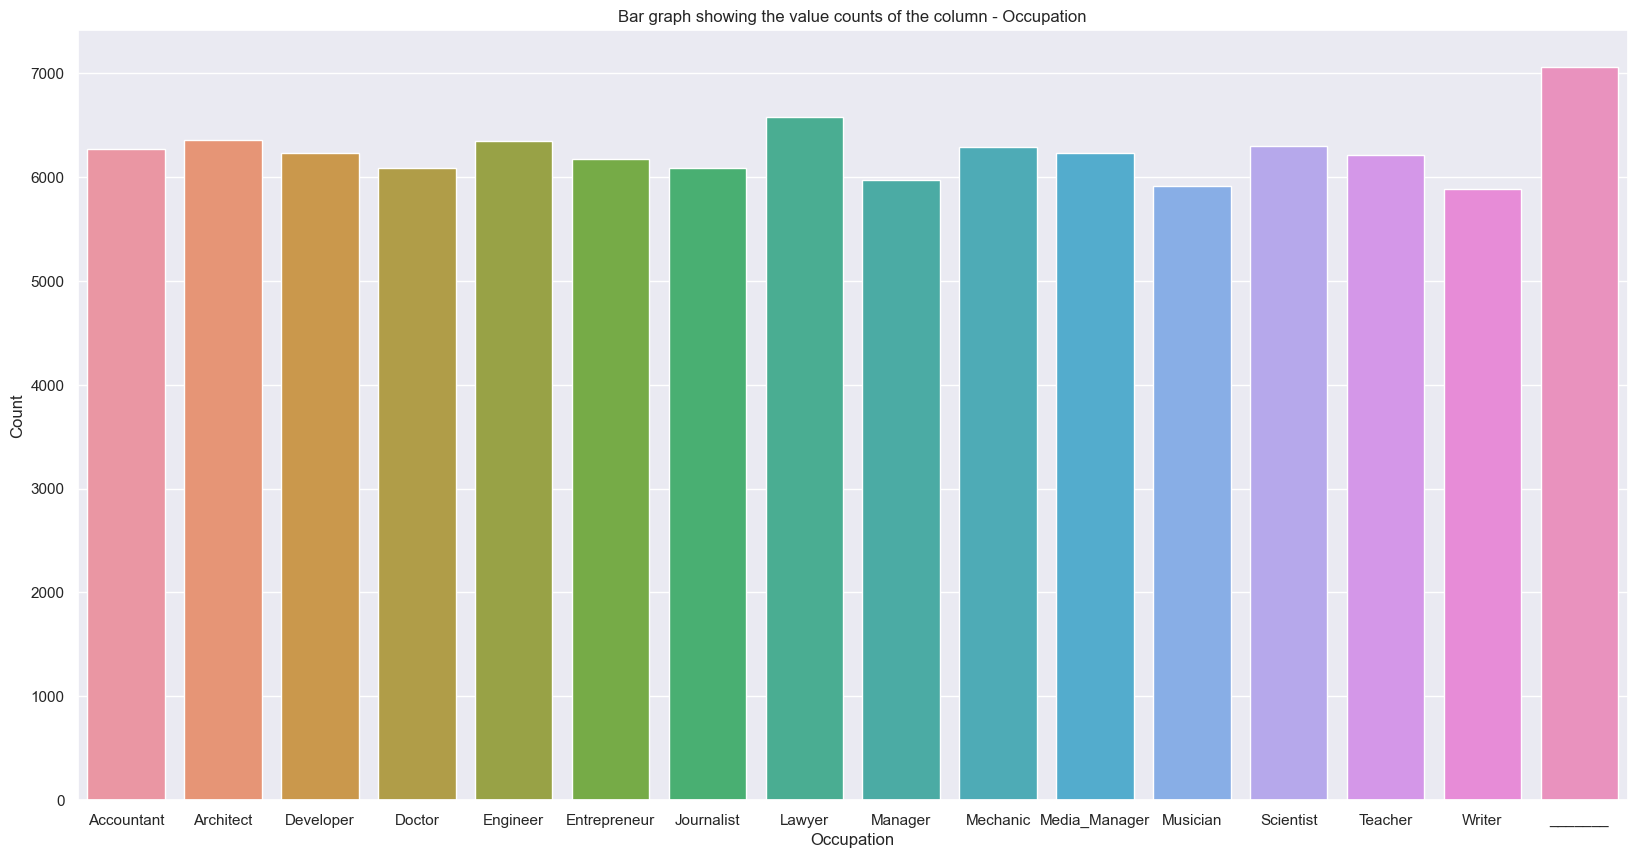

In [888]:
#Bar graph showing the value counts of the column - Occupation
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)
plt.show()

From the above graph, we can see that most of the jobs are 'unnamed'.

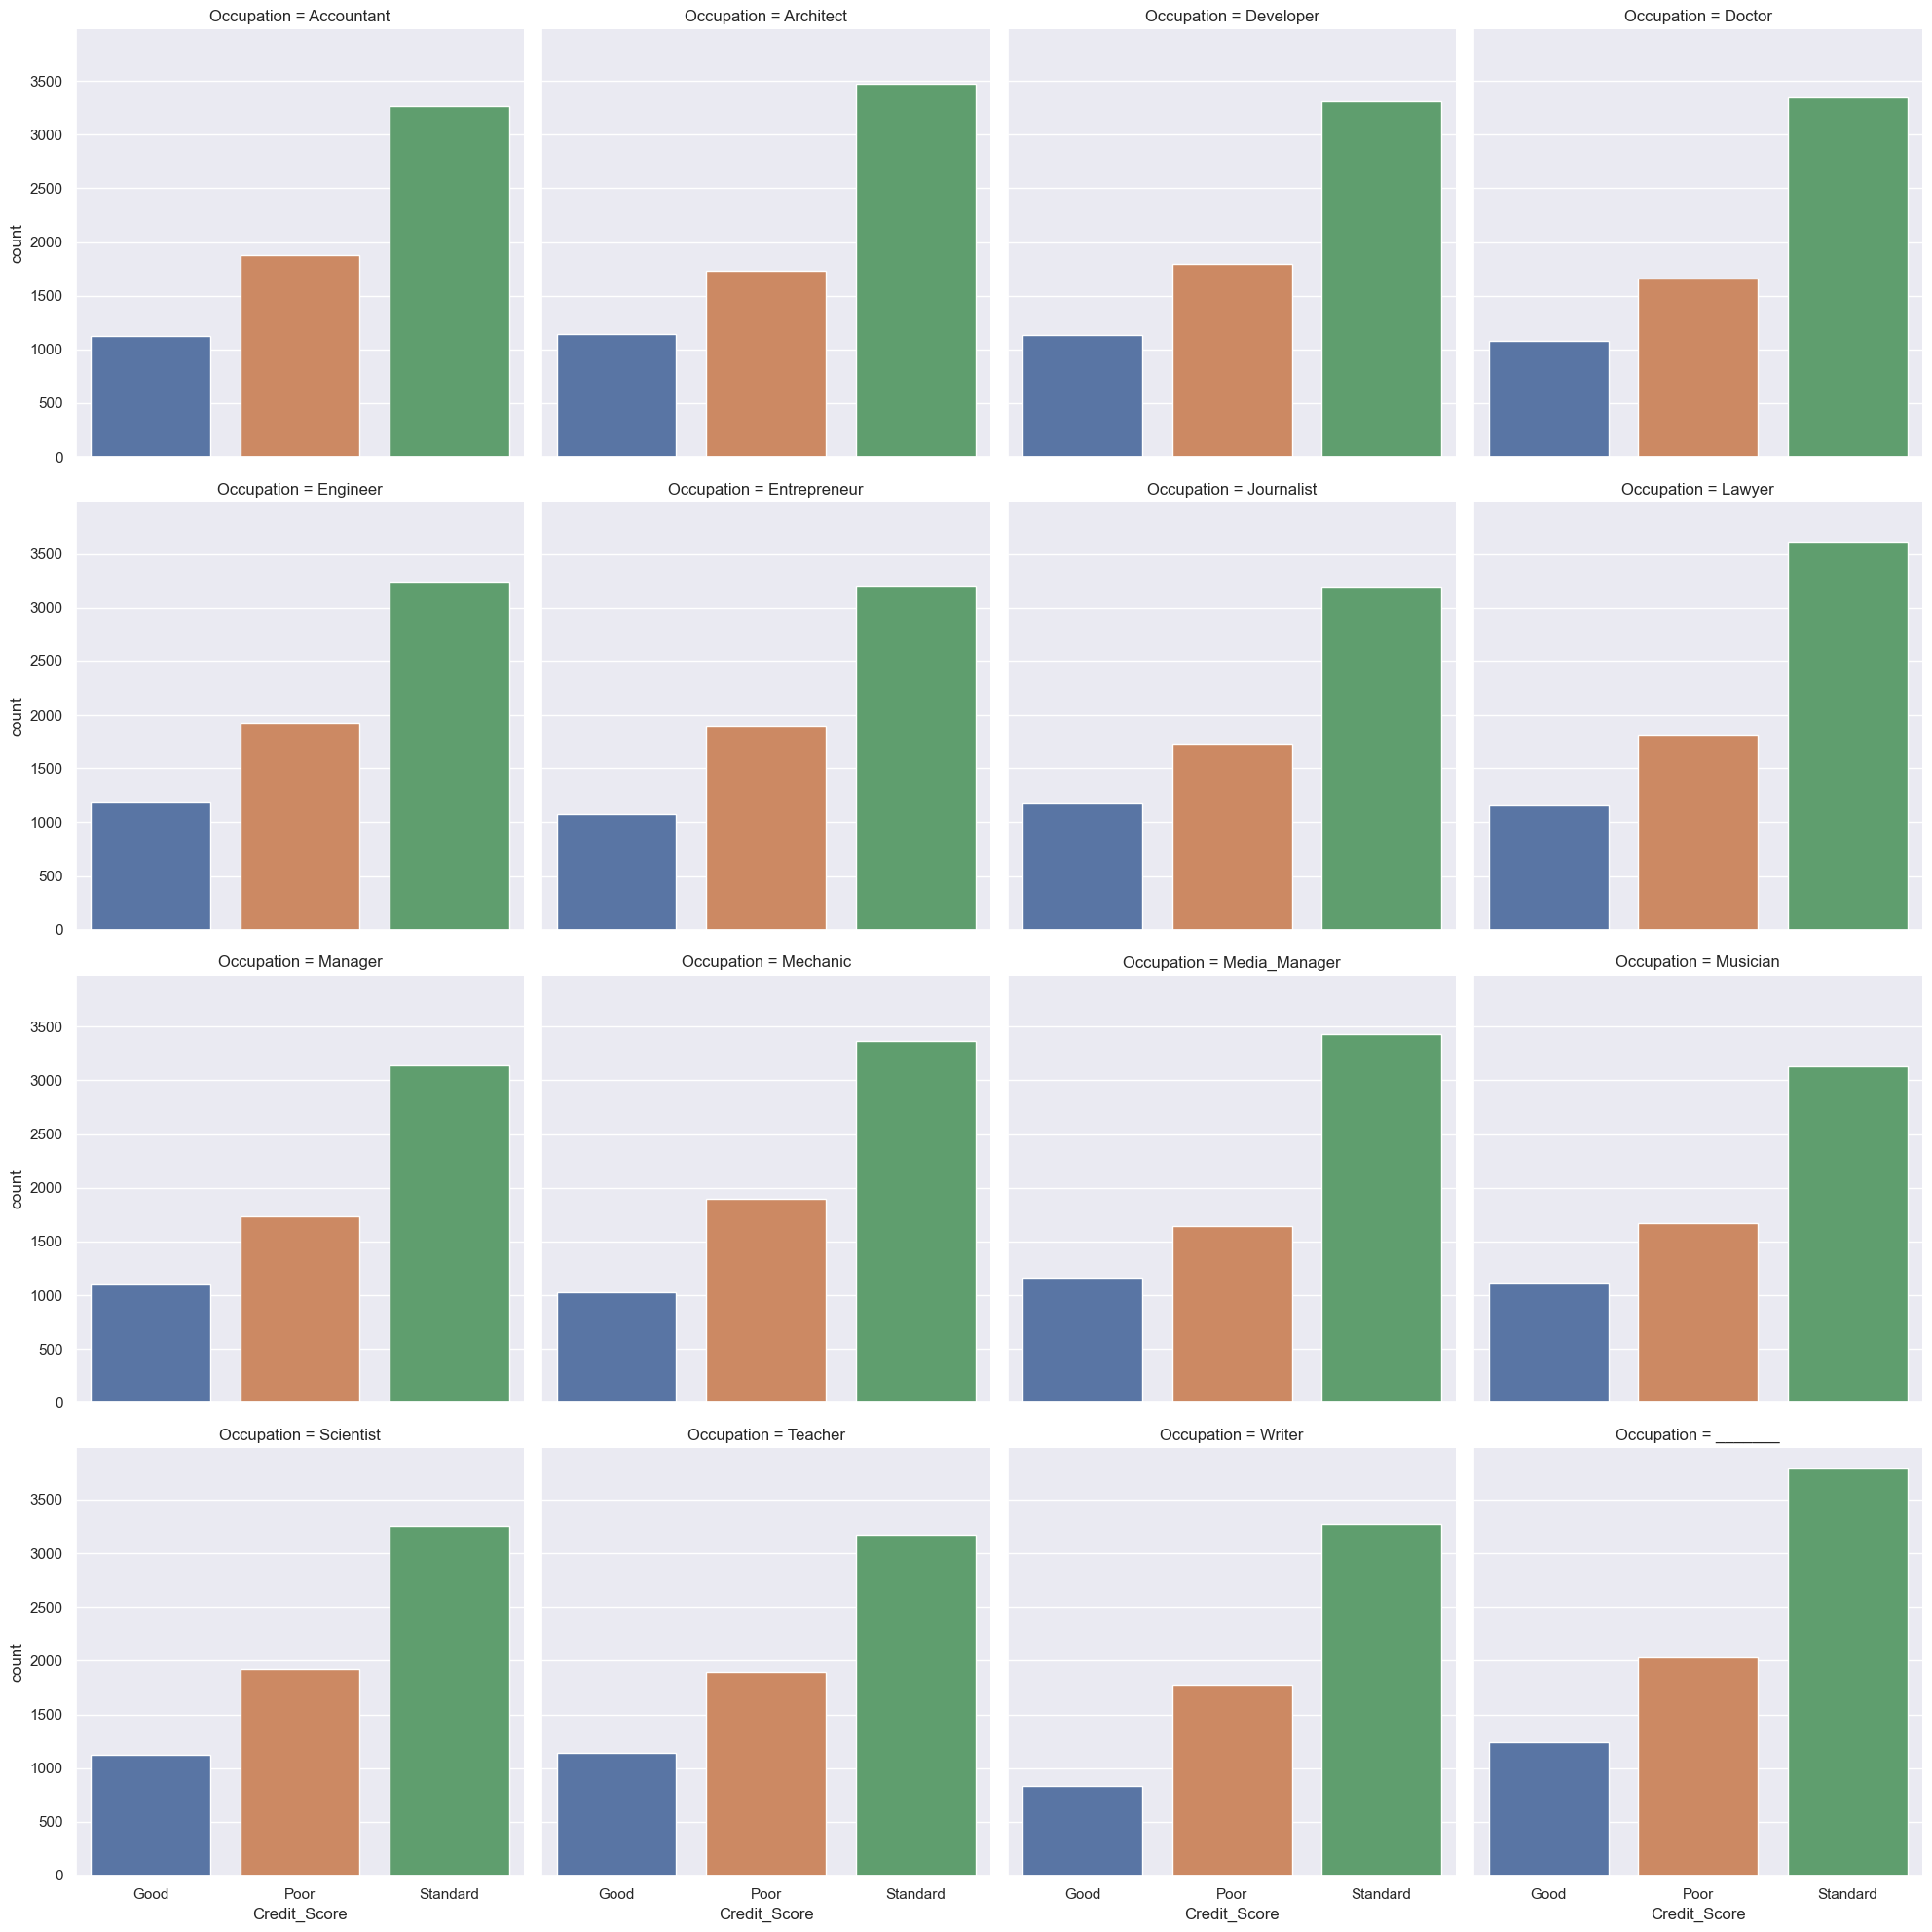

In [891]:
#Distribution of Credit_Score for each Occupation

sns.catplot(x='Credit_Score', col='Occupation', data=dataset, kind='count', col_wrap=4)

From the above graphs, we can see that most of the people have a Credit Score in the Standard range for all the Occupations.

In [892]:
#Categorical variable - Type of Loan
#Fetching the not null data of the column - Type of Data 

index_values = ~dataset['Type_of_Loan'].isnull().values
loan_type_data = list(dataset['Type_of_Loan'][index_values])

In [893]:
#Create a dictionary to store the counts of all the various loan types

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

Text(0.5, 0, 'Type_of_Loan')

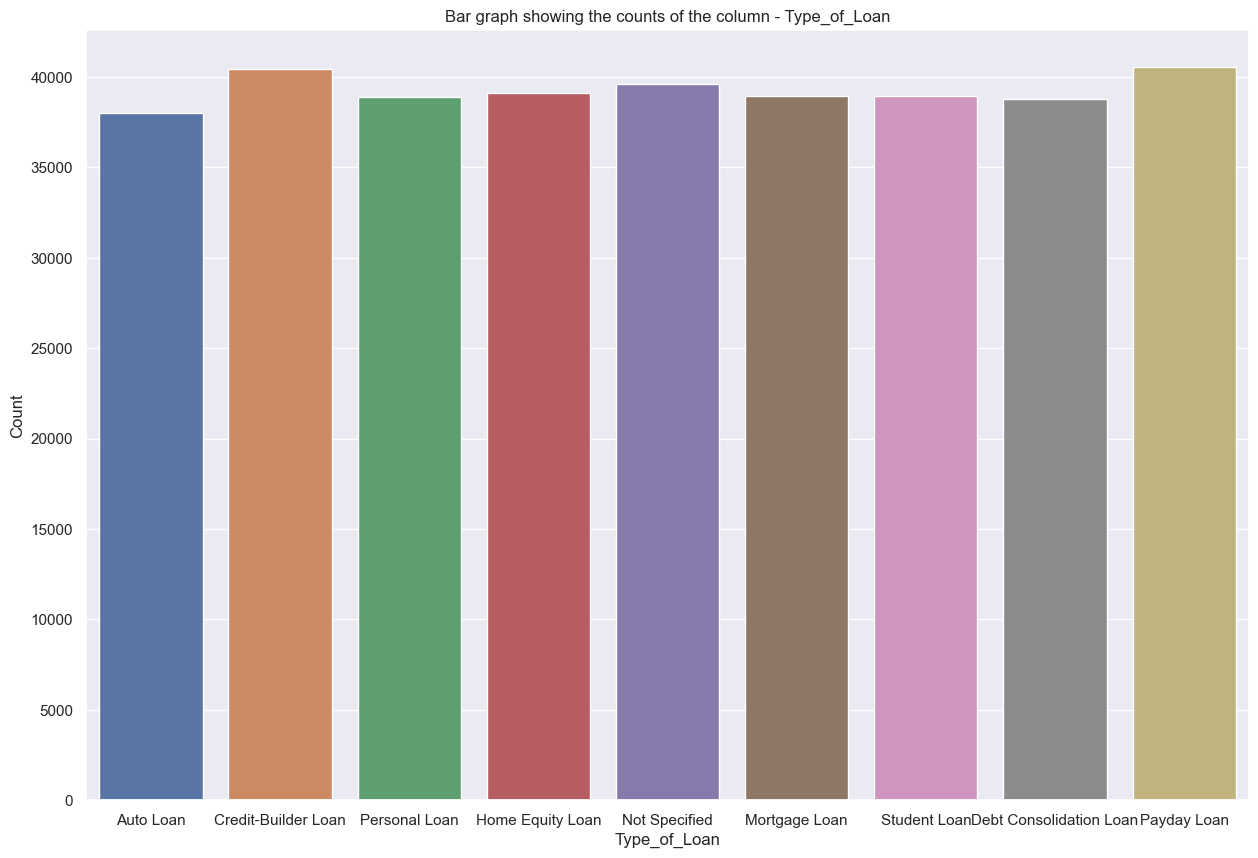

In [895]:
#Bar graph showing the counts of the column - Type_of_Loan

sns.set(rc = {'figure.figsize': (15, 10)})
sns.barplot(x=list(loan_type_dict.keys()), y=list(loan_type_dict.values()))
plt.title('Bar graph showing the counts of the column - Type_of_Loan')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type_of_Loan', fontsize = 12)

In [896]:
#Categorical variable - Credit_MIx
#Value counts of the column - Credit_Mix

credit_mix_count = dataset['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

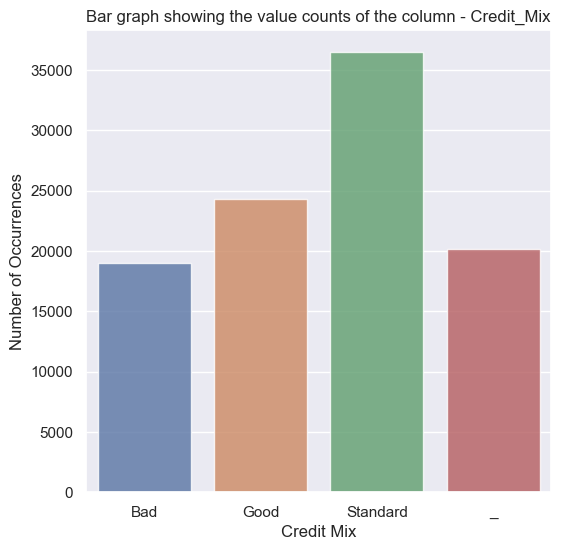

In [682]:
#Bar graph showing the value counts of the column - Credit_Mix

sns.set(rc = {'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Credit Mix', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customers have a 'Standard' credit mix.

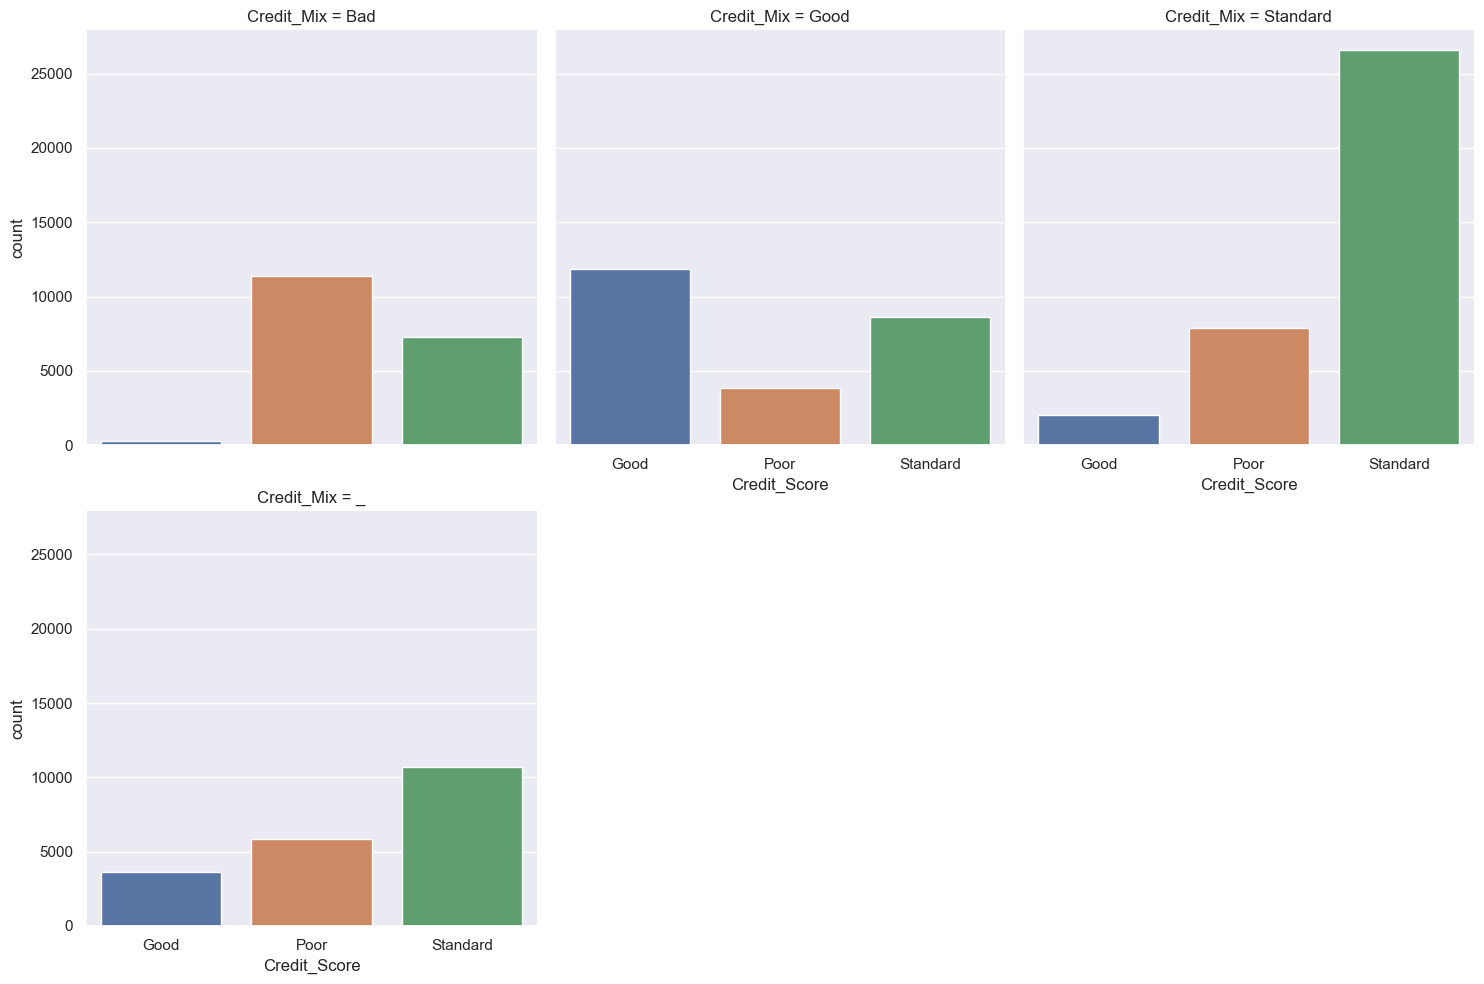

In [897]:
#Distribution of Credit_Score for each Credit_Mix

sns.catplot(x='Credit_Score', col = 'Credit_Mix', data = dataset, kind = 'count', col_wrap = 3)

From the above graphs, we can see that the columns - Credit_Mix and Credit_Score are almost similar.

In [898]:
#Categorical variable - Payment_of_Min_Amount
#Value counts of the column - Payment_of_Min_Amount

min_amount_count = dataset['Payment_of_Min_Amount'].value_counts(dropna = False)
min_amount_count

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

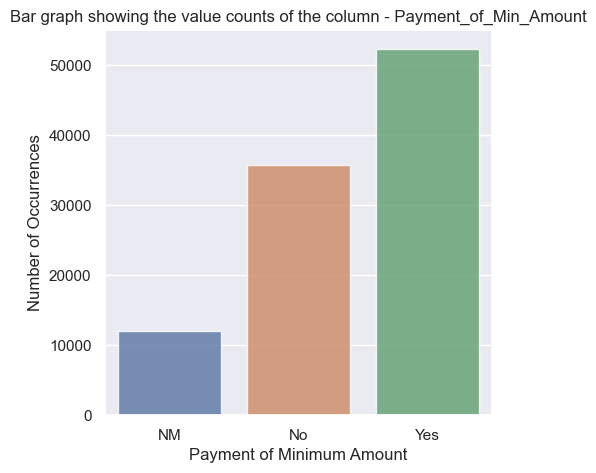

In [685]:
#Bar graph showing the value counts of the column - Payment_of_Min_Amount

sns.set(rc = {'figure.figsize': (5, 5)})
sns.barplot(x=min_amount_count.index, y=min_amount_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Payment_of_Min_Amount')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Payment of Minimum Amount', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customer's paid a minimum amount for their loans.

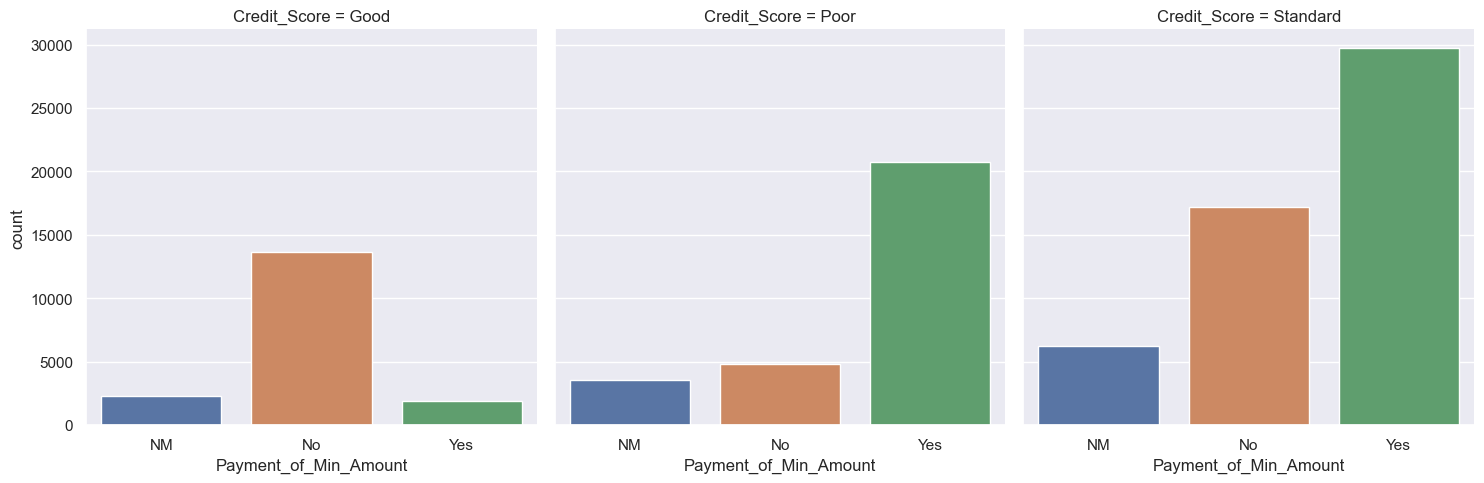

In [899]:
#Distribution of Payment_of_Min_Amount for each Credit Score

sns.catplot(x='Payment_of_Min_Amount', col = 'Credit_Score', data = dataset, kind = 'count', col_wrap = 3)

From the above graphs, we can see that the most of the customers with a good credit score didn't pay the minimum amount for the loan. Similarly, customers with a poor credit score paid the minimum amount for the loan.

Text(0.5, 1.0, 'Customer Age Distribution')

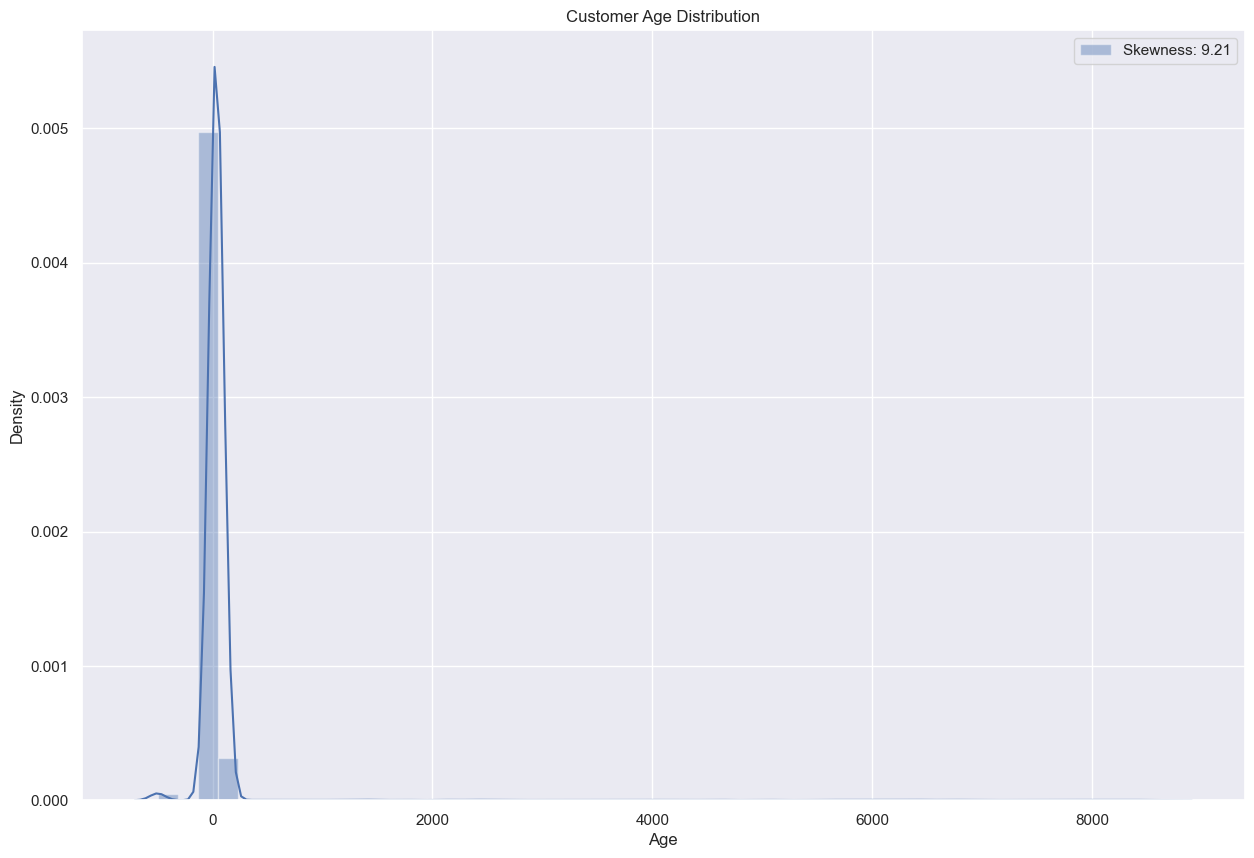

In [901]:
#Numerical variable - Age
# Understanding the distribution of the column - Age

sns.distplot(dataset['Age'], label = 'Skewness: %.2f'%(dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

From the above graph, we can see that the above graph has a high degree of skewness.

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

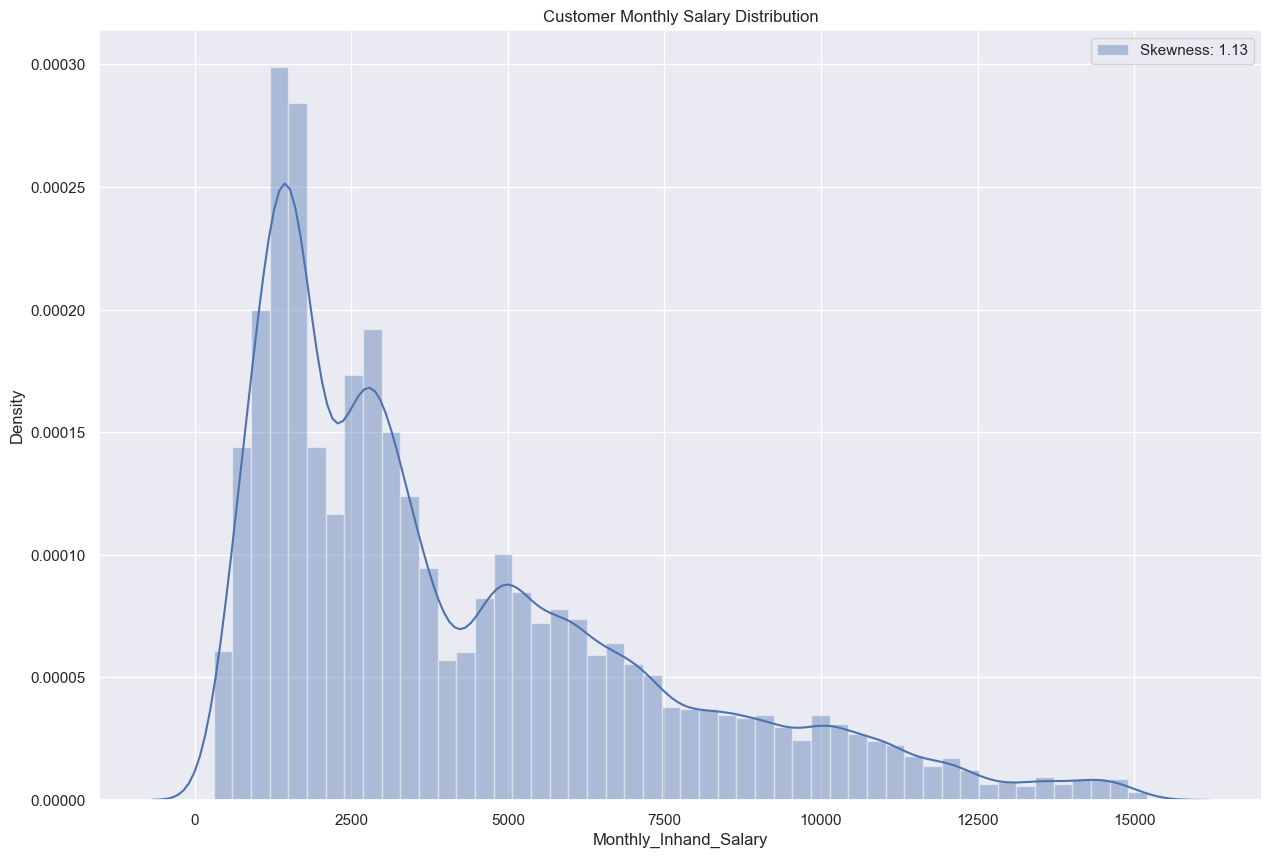

In [902]:
#Numerical variable - Monthly_Inhand_Salary
#Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(dataset['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(dataset['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')


From the above graph, we can see that the distribution is right skewed and has a slight degree of skewness.

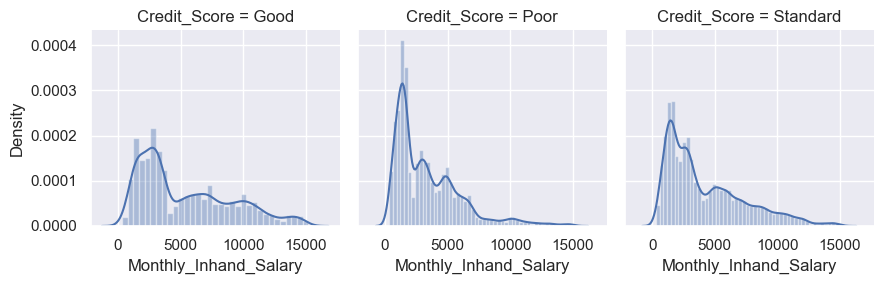

In [903]:
#Monthly Inhand Salary distribution by Credit Score

grid = sns.FacetGrid(dataset, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')
plt.show()


Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

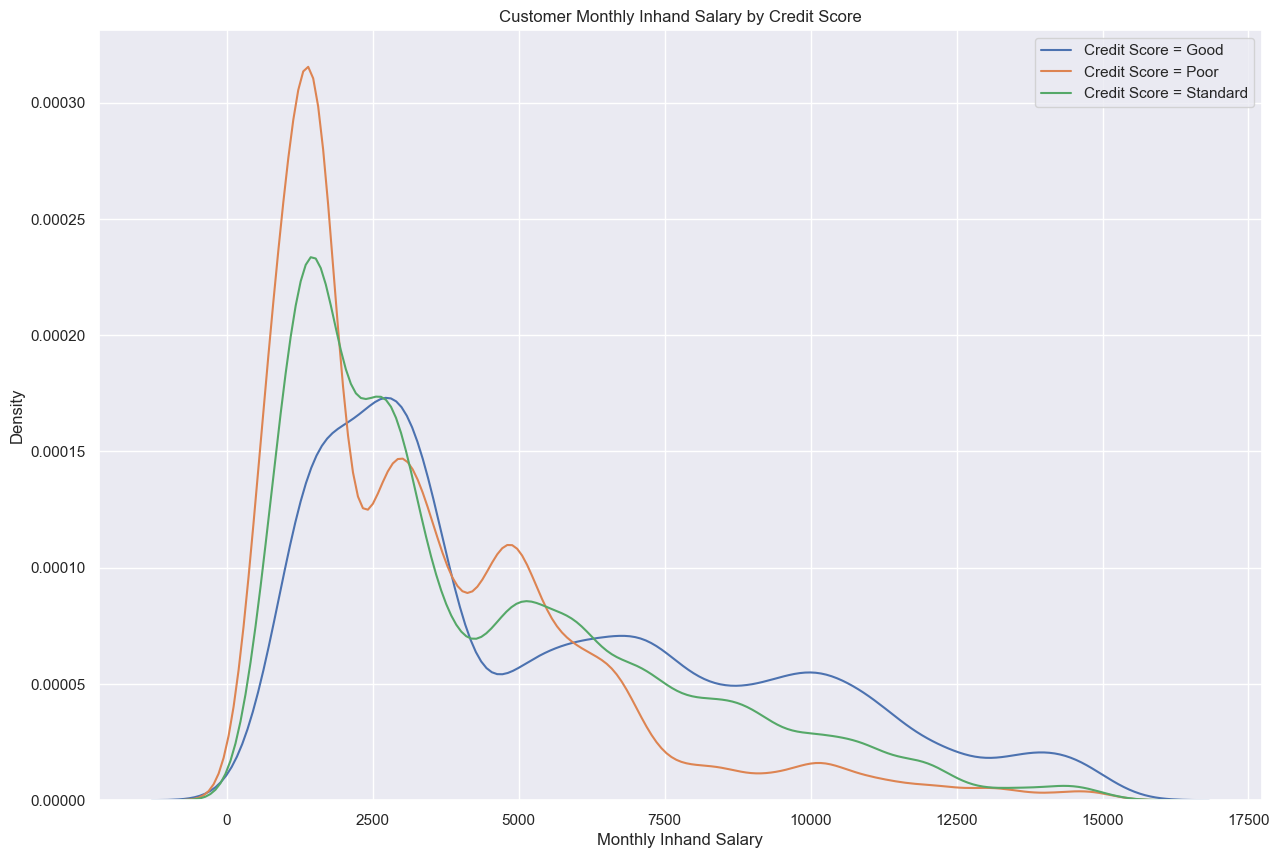

In [904]:
# Merging the above graphs into one

sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

From the above graph, we can see that most of the customer's who have a Poor credit score have a low monthly inhand salary than compared to the customer's who have a Standard and a Good credit score.

Text(0.5, 1.0, 'Customers Interest Rate Distribution')

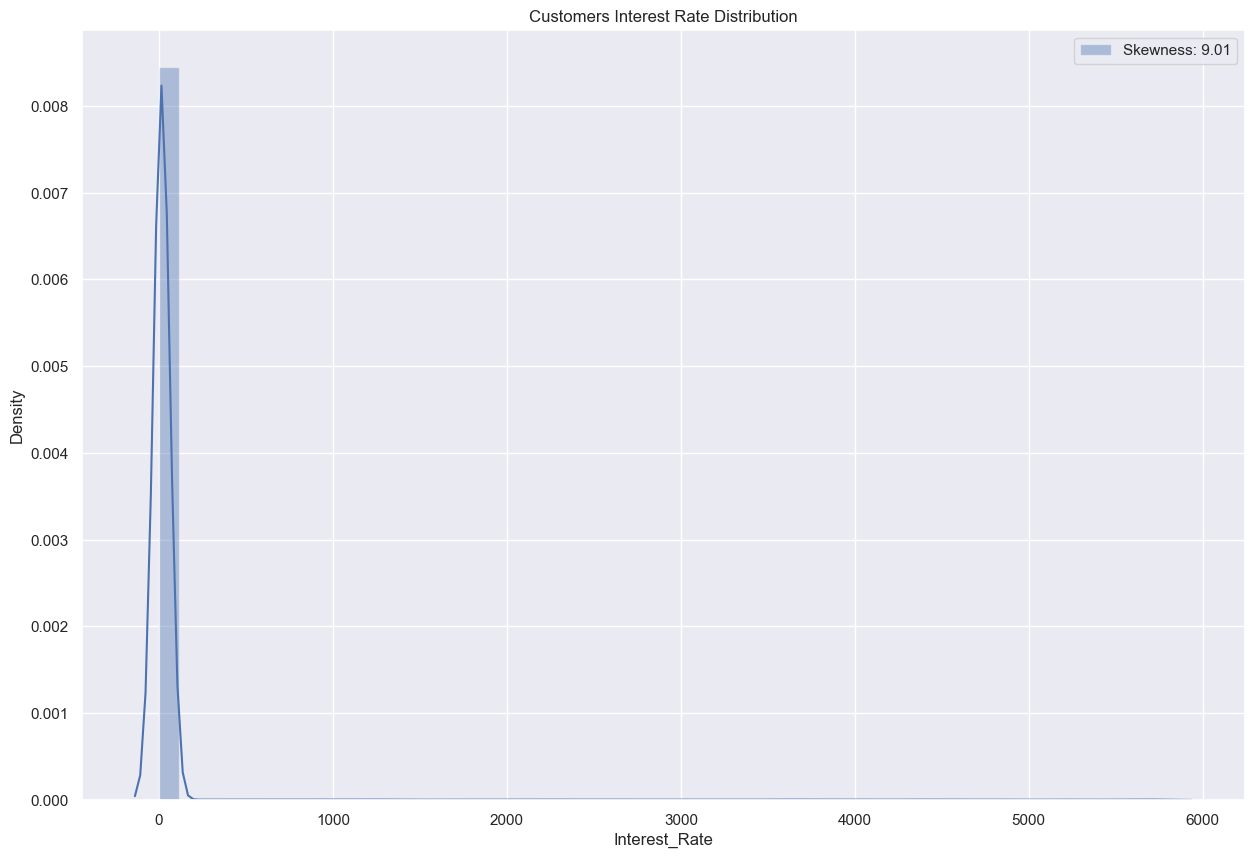

In [905]:
#Numerical variable - Interest_Rate
#Understanding the distribution of the column - Interest_Rate

sns.distplot(dataset['Interest_Rate'], label = 'Skewness: %.2f'%(dataset['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Customers Interest Rate Distribution')

From the above graph, we can see that the above graph has a high degree of skewness.

Text(0.5, 1.0, "Customer's Outstanding Debt  Distribution")

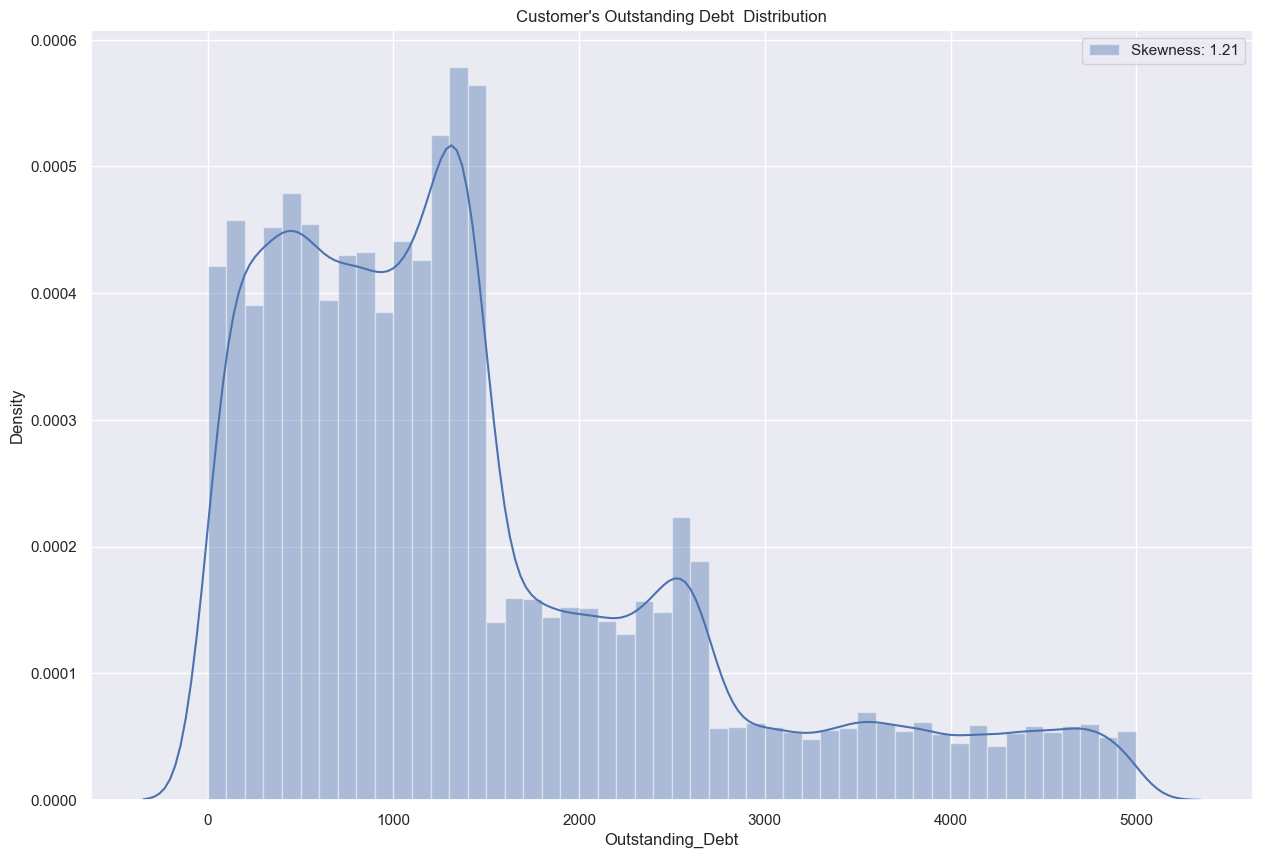

In [906]:
#Numerical variable - Outstanding_Debt
#Understanding the distribution of the column - Outstanding_Debt

sns.distplot(dataset['Outstanding_Debt'], label = 'Skewness: %.2f'%(dataset['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title("Customer's Outstanding Debt  Distribution")


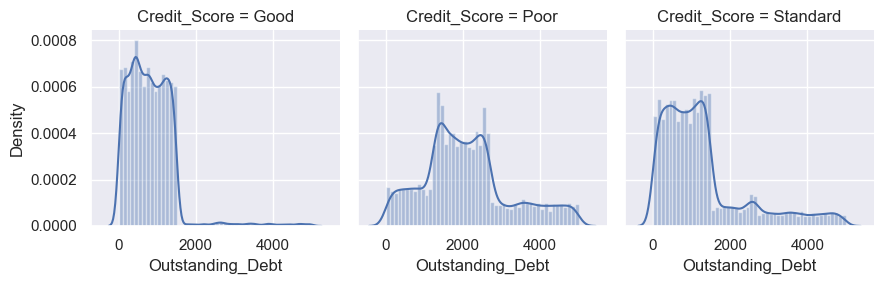

In [907]:
#Outstanding Debt distribution by Credit Score

grid = sns.FacetGrid(dataset, col = 'Credit_Score')
grid.map(sns.distplot, 'Outstanding_Debt')


Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

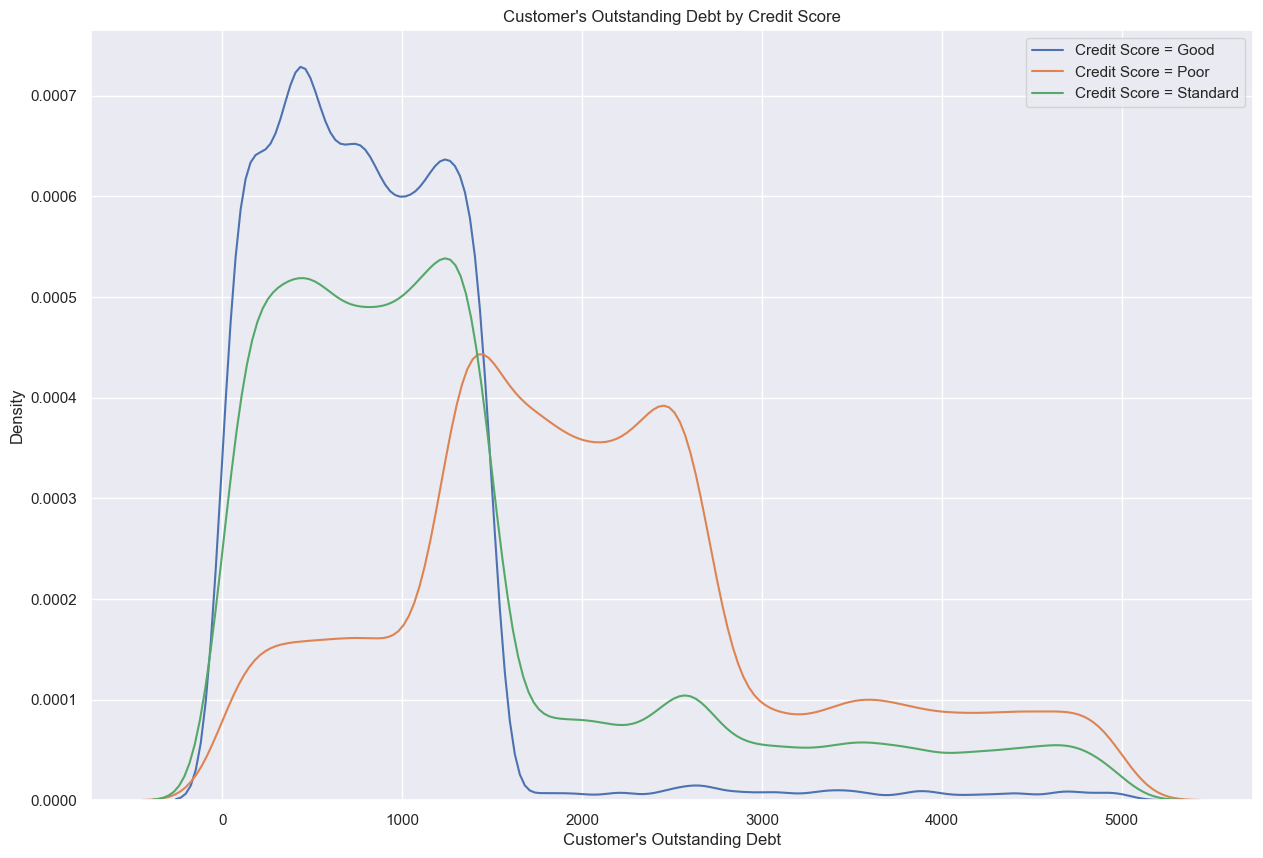

In [908]:
#Merging the above graphs into one

sns.kdeplot(dataset['Outstanding_Debt'][dataset['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(dataset['Outstanding_Debt'][dataset['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(dataset['Outstanding_Debt'][dataset['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

From the above graph, we can see that customer's who have a Good credit score have very low outstanding debt than compared to the customer's who have Standard and Poor credit score.

Data preprocessing

In [909]:
#Detect and remove outliers in numerical variables

def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

# List of numerical columns
numerical_columns = list(dataset.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))

# Detect and drop outliers
outliers_to_drop = detect_outliers(dataset, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
We will drop these 484 indices:  [1293, 2902, 3189, 3690, 7036, 7882, 8558, 8660, 9736, 9879, 10840, 12673, 13036, 13486, 15026, 17379, 17827, 18004, 18349, 20250, 20537, 20538, 22612, 24240, 24736, 25123, 25603, 25878, 25923, 27836, 27875, 28278, 30249, 31288, 31399, 31985, 33553, 34160, 34565, 34582, 35270, 35783, 36015, 36053, 36855, 36985, 37534, 39169, 39393, 41557, 41749, 43050, 44633, 44634, 45410, 46737, 47961, 48455, 48536, 48794, 50233, 51828, 53352, 54009, 54030, 56161, 56166, 58772, 59049, 60088, 60659, 61146, 61938, 62054, 63816, 64165, 65928, 68449, 68810, 69041, 73756, 76155, 77767, 78865, 78900, 81038, 81041, 82992, 83102

Now let's look at the data present in the rows.

In [910]:
dataset.iloc[outliers_to_drop, :]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1293,0x1d93,CUS_0xb9ea,June,Aileen Wangy,2744.0,202-04-9323,Writer,9133.045,NaN,6,...,Bad,3035.88,36.669441,9 Years and 4 Months,Yes,77767.000000,48.454512,!@9#%8,269.053164,Good
2902,0x2700,CUS_0x67ff,July,Barlyni,7992.0,017-88-1687,Manager,82700.320,6625.693333,8,...,Bad,4659.60,39.950138,12 Years and 1 Months,Yes,392.114333,10000.000000,High_spent_Medium_value_payments,372.265534,Poor
3189,0x28af,CUS_0x3fa8,June,Kumarp,471.0,283-56-6375,Writer,177243.920,14526.326667,4,...,Good,488.95,37.041853,28 Years and 9 Months,NM,284.804197,485.387942,!@9#%8,942.440528,Standard
3690,0x2ba0,CUS_0x29b2,March,Martinnet,1170.0,626-80-0791,Media_Manager,59930.040,5207.170000,7,...,Bad,4474.29,32.303684,1 Years and 11 Months,Yes,156.596164,165.383895,High_spent_Medium_value_payments,448.736941,Standard
7036,0x3f3a,CUS_0x3949,May,Scotto,6520.0,908-89-0498,Musician,63353.680,5356.473333,9,...,Bad,4362.52,31.463332,1 Years and 2 Months,NM,390.451288,233.035327,Low_spent_Large_value_payments,182.160718,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96585,0x24bef,CUS_0xbe4d,February,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,Bad,4320.49,28.977497,5 Years and 4 Months,Yes,446.366715,118.788667,High_spent_Medium_value_payments,266.862618,Standard
96586,0x24bf0,CUS_0xbe4d,March,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,NaN,7,...,Bad,4320.49,24.809802,5 Years and 5 Months,Yes,446.366715,287.084007,Low_spent_Medium_value_payments,128.567278,Poor
96589,0x24bf3,CUS_0xbe4d,June,NaN,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,Bad,4320.49,29.395568,5 Years and 8 Months,Yes,446.366715,545.426595,Low_spent_Small_value_payments,NaN,Poor
96590,0x24bf4,CUS_0xbe4d,July,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,_,4320.49,26.766928,5 Years and 9 Months,Yes,446.366715,168.901072,High_spent_Medium_value_payments,216.750214,Poor


We will drop these rows from the dataset.

In [911]:
#Drop outliers and reset index

print("Before: {} rows".format(len(dataset)))
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 100000 rows
After: 99516 rows


In [912]:
#Lets look at the new dataset

dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99512,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99513,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99514,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


Drop and fill missing values
Here, we will drop the columns - ID, Customer_ID, Name, SSN, Credit_Mix, Num_of_Loan, Credit_Utilization_Ratio, Credit_History_Age, Payment_Behavior, Annual_Income, Monthly_Balance, Num_Bank_Accounts, Num_Credit_Card from the datasets.

In [913]:
#Dropping the columns from the dataset

dataset.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_Mix', 'Num_of_Loan',
             'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_Behaviour', 
             'Annual_Income', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card'], axis = 1, inplace = True)
dataset

,Month,Age,Occupation,Monthly_Inhand_Salary,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,January,23.0,Scientist,1824.843333,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,No,49.574949,80.415295,Good
1,February,23.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,No,49.574949,118.280222,Good
2,March,-500.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,0.00,4.0,809.98,No,49.574949,81.699521,Good
3,April,23.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,No,49.574949,199.458074,Good
4,May,23.0,Scientist,1824.843333,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,No,49.574949,41.420153,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,April,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,No,35.104023,60.971333,Poor
99512,May,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,No,35.104023,54.185950,Poor
99513,June,25.0,Mechanic,3359.415833,5729,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,No,35.104023,24.028477,Poor
99514,July,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,502.38,No,35.104023,251.672582,Standard


In [914]:
#Looking at the missing values in the dataset

dataset.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary      14931
Type_of_Loan               11392
Num_of_Delayed_Payment      6972
Amount_invested_monthly     4452
Num_Credit_Inquiries        1949
Month                          0
Age                            0
Occupation                     0
Interest_Rate                  0
Delay_from_due_date            0
Changed_Credit_Limit           0
Outstanding_Debt               0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Credit_Score                   0
dtype: int64

From the above data, we can see that there are missing values in the columns - Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries. Here, we will focus on removing the missing values in the columns - Monthly_Inhand_Salary, Num_of_Delayed_Payment, Amount_invested_monthly, and Num_Credit_Inquiries. However, we will replace the missing values in the column - Type_of_Loan in the Feature Engineering section.

Here, for replacing the missing values in the column - Monthly_Inhand_Salary, we will use the column Credit_Score and find the mean of the salary based on the Credit Score.

In [921]:
#Handling missing values - Monthly_Inhand_Salary
#Finding the mean value of the column - Monthly_Inhand_Salary in the dataset using Credit_Score

salary_good_mean = np.mean(dataset[dataset['Credit_Score'] == 'Good']['Monthly_Inhand_Salary'])
salary_poor_mean = np.mean(dataset[dataset['Credit_Score'] == 'Poor']['Monthly_Inhand_Salary'])
salary_standard_mean = np.mean(dataset[dataset['Credit_Score'] == 'Standard']['Monthly_Inhand_Salary'])

(salary_good_mean, salary_poor_mean, salary_standard_mean)

(5379.965723477946, 3371.847702514712, 4238.79360473507)

In [922]:
#Finding the indices of the rows where Monthly_Inhand_Salary is null
index_values = dataset['Monthly_Inhand_Salary'].isnull()

In [923]:
#Replacing the missing values in the column Monthly_Inhand_Salary using the decision logic
for index in range(len(dataset)):
    if index_values[index]:
        if dataset['Credit_Score'][index] == 'Good':
            dataset.loc[index, 'Monthly_Inhand_Salary'] = salary_good_mean
        elif dataset['Credit_Score'][index] == 'Poor':
            dataset.loc[index, 'Monthly_Inhand_Salary'] = salary_poor_mean
        else:
            dataset.loc[index, 'Monthly_Inhand_Salary'] = salary_standard_mean

In [924]:
#Checking if there are any missing values of Monthly_Inhand_Salary in the dataset

dataset['Monthly_Inhand_Salary'].isnull().sum()

0

Here, we will use the median to replace the missing values in the column - Num_of_Delayed_Payment.

In [925]:
#Handling missing values - Num_of_Delayed_Payment
#Finding the median value of the column - Num_of_Delayed_Payment in the dataset

payment_index = list(~dataset['Num_of_Delayed_Payment'].isnull())
median_payment = np.median(dataset['Num_of_Delayed_Payment'].loc[payment_index])
median_payment

14.0

In [926]:
#Replacing the missing values of the column - Num_of_Delayed_Payment in the dataset
dataset['Num_of_Delayed_Payment'].fillna(median_payment, inplace = True)

In [927]:
#Checking if there are any missing values of Num_of_Delayed_Payment in the dataset
dataset['Num_of_Delayed_Payment'].isnull().sum()

0

Here, we will use the median to replace the missing values in the column - Amount_invested_monthly.

In [928]:
#Handling missing values - Amount_invested_monthly
#Finding the median value of the column - Amount_invested_monthly in the dataset

amount_index = list(~dataset['Amount_invested_monthly'].isnull())
median_amount = np.median(dataset['Amount_invested_monthly'].loc[amount_index])
median_amount

135.91926936353195

In [929]:
#Replacing the missing values of the column - Amount_invested_monthly in the dataset

dataset['Amount_invested_monthly'].fillna(median_amount, inplace = True)

In [930]:
#Checking if there are any missing values of Amount_invested_monthly in the dataset

dataset['Amount_invested_monthly'].isnull().sum()

0

Here, we will use the median to replace the missing values in the column - Num_Credit_Inquiries.

In [931]:
#Handling missing values - Num_Credit_Inquiries
#Finding the median value of the column - Num_Credit_Inquiries in the dataset

inquiries_index = list(~dataset['Num_Credit_Inquiries'].isnull())
median_inquiries = np.median(dataset['Num_Credit_Inquiries'].loc[inquiries_index])
median_inquiries

6.0

In [932]:
#Replacing the missing values of the column - Num_Credit_Inquiries in the dataset

dataset['Num_Credit_Inquiries'].fillna(median_inquiries, inplace = True)

In [933]:
#Checking if there are any missing values of Num_Credit_Inquiries in the dataset

dataset['Num_Credit_Inquiries'].isnull().sum()

0

In [934]:
#Looking if the dataset has any more missing values apart from Type_of_Loan

dataset.isnull().sum().sort_values(ascending = False)

Type_of_Loan               11392
Month                          0
Age                            0
Occupation                     0
Monthly_Inhand_Salary          0
Interest_Rate                  0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Credit_Score                   0
dtype: int64

4.Data Engineering

Here, we will create 8 different columns using the loan_type_dict dictionary. Here, we will not consider the value Not Specified for the loan type.

In Data engineering, new features are added to the dataset. This includes changing 'Month', 'Occupation', and 'Payment_of_Min_Amount' into a format that can easily work. The 'Type_of_Loan' is split into several simpler columns, each indicating a specific type of loan. Also, to make the model learn better, some of the numbers in the dataset are adjusted using log transformations to make their distribution more even.

In [935]:
loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

In [936]:
#Individual columns for Type_of_Loan
#Creating 8 different lists for each loan type

auto_loan = [0] * (len(dataset))
credit_builder_loan = [0] * (len(dataset))
personal_loan = [0] * (len(dataset))
home_equity_loan = [0] * (len(dataset))
mortgage_loan = [0] * (len(dataset))
student_loan = [0] * (len(dataset))
debt_consolidation_loan = [0] * (len(dataset))
payday_loan = [0] * (len(dataset))

In [937]:
# Using 0's and 1's if a customer has a particular loan

for index in range(len(loan_type_data)):
    ### For Auto Loan
    if 'Auto' in loan_type_data[index]:
        auto_loan[index] = 1
    
    ### For Credit Builder Loan
    if 'Credit-Builder' in loan_type_data[index]:
        credit_builder_loan[index] = 1
        
    ### For Personal Loan
    if 'Personal' in loan_type_data[index]:
        personal_loan[index] = 1
    
    ### For Home Equity Loan
    if 'Home' in loan_type_data[index]:
        home_equity_loan[index] = 1
    
    ### For Mortgage Loan
    if 'Mortgage' in loan_type_data[index]:
        mortgage_loan[index] = 1
    
    ### For Student Loan
    if 'Student' in loan_type_data[index]:
        student_loan[index] = 1
        
    ### For Debt Consolidation loan
    if 'Debt' in loan_type_data[index]:
        debt_consolidation_loan[index] = 1
    
    ### For Payday loan
    if 'Payday' in loan_type_data[index]:
        payday_loan[index] = 1

In [938]:
#Adding the new columns to the dataset

dataset['Auto_Loan'] = auto_loan
dataset['Credit_Builder_Loan'] = credit_builder_loan
dataset['Personal_Loan'] = personal_loan
dataset['Home_Enquity_Loan'] = home_equity_loan
dataset['Mortgage_Loan'] = mortgage_loan
dataset['Student_Loan'] = student_loan
dataset['Debt_Consolidation_Loan'] = debt_consolidation_loan
dataset['Payday_Loan'] = payday_loan

In [939]:
#Removing the column - Type_of_loan

dataset.drop(['Type_of_Loan'], axis = 1, inplace = True)

In [940]:
#Looking at the modified dataset

dataset

,Month,Age,Occupation,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,...,Amount_invested_monthly,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,January,23.0,Scientist,1824.843333,3,3,7.0,11.27,4.0,809.98,...,80.415295,Good,1,1,1,1,0,0,0,0
1,February,23.0,Scientist,5379.965723,3,-1,14.0,11.27,4.0,809.98,...,118.280222,Good,1,1,1,1,0,0,0,0
2,March,-500.0,Scientist,5379.965723,3,3,7.0,0.00,4.0,809.98,...,81.699521,Good,1,1,1,1,0,0,0,0
3,April,23.0,Scientist,5379.965723,3,5,4.0,6.27,4.0,809.98,...,199.458074,Good,1,1,1,1,0,0,0,0
4,May,23.0,Scientist,1824.843333,3,6,14.0,11.27,4.0,809.98,...,41.420153,Good,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,April,25.0,Mechanic,3359.415833,7,23,7.0,11.50,3.0,502.38,...,60.971333,Poor,0,0,0,0,0,0,0,0
99512,May,25.0,Mechanic,3359.415833,7,18,7.0,11.50,3.0,502.38,...,54.185950,Poor,0,0,0,0,0,0,0,0
99513,June,25.0,Mechanic,3359.415833,5729,27,6.0,11.50,3.0,502.38,...,24.028477,Poor,0,0,0,0,0,0,0,0
99514,July,25.0,Mechanic,3359.415833,7,20,14.0,11.50,3.0,502.38,...,251.672582,Standard,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Customer Age Distribution')

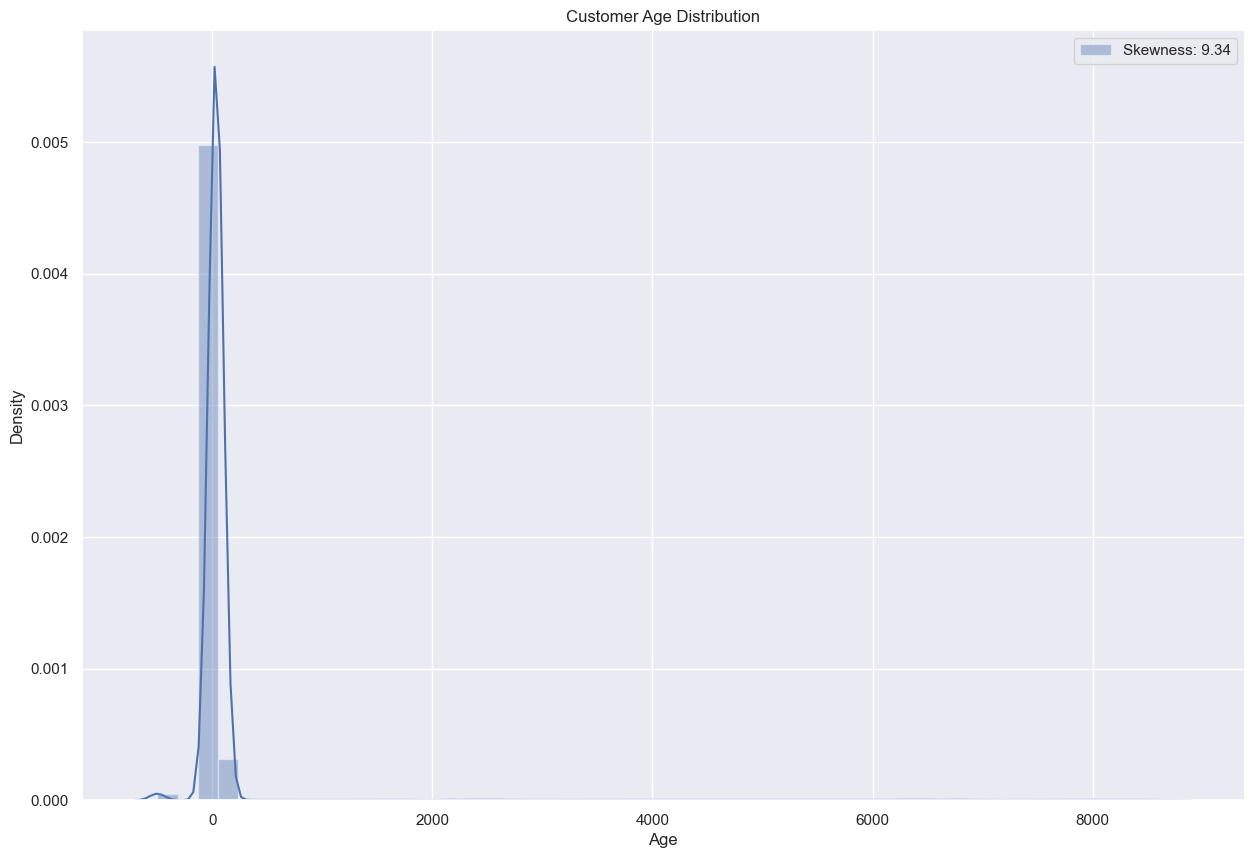

In [941]:
#Log Transforming the column - Age
#Understanding the distribution of the column - Age

sns.distplot(dataset['Age'], label = 'Skewness: %.2f'%(dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

Text(0.5, 1.0, 'Customer Age Distribution')

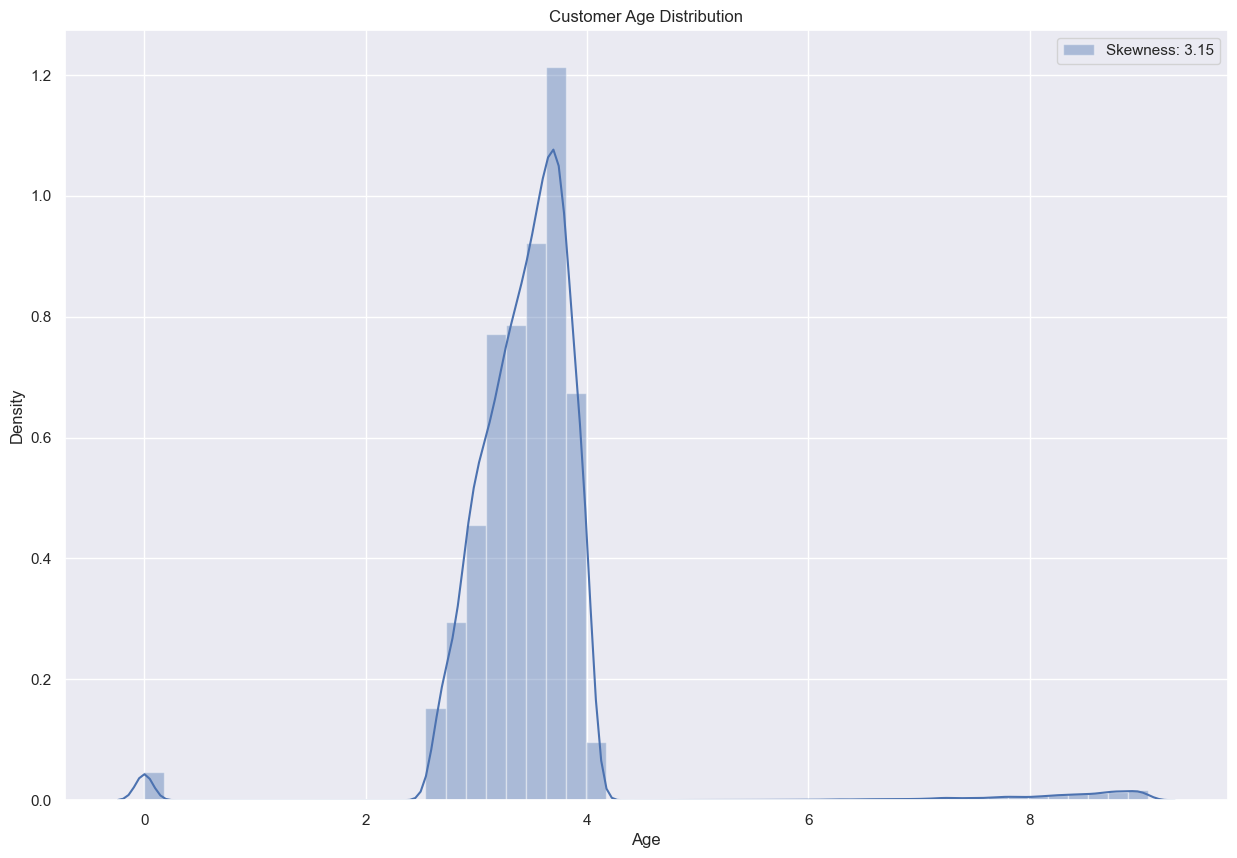

In [942]:
#Understanding the distribution of the data log(Age)

modified_age = [np.log(age) if age > 0 else 0 for age in dataset['Age']]
dataset['Age'] = modified_age

sns.distplot(dataset['Age'], label = 'Skewness: %.2f'%(dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

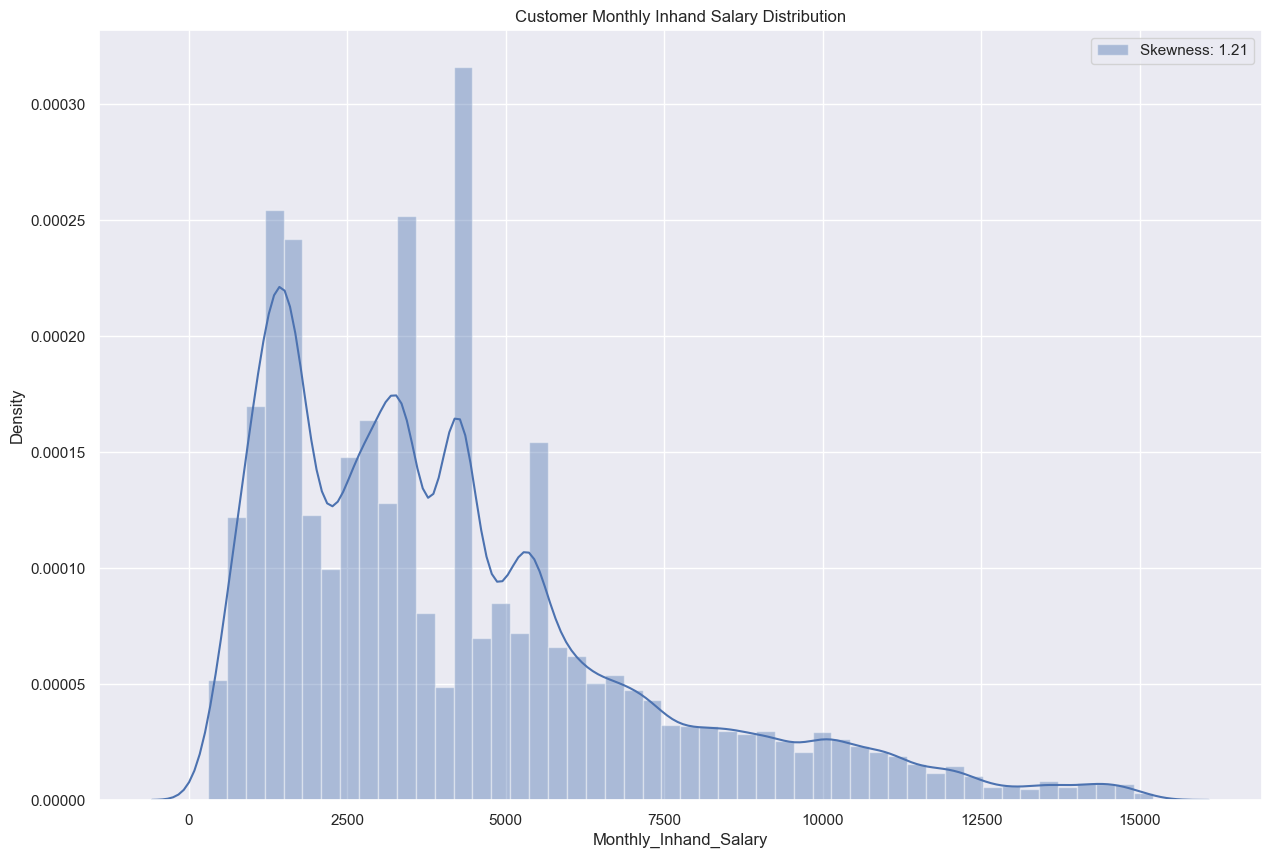

In [943]:
#Log Transforming the column - Monthly_Inhand_Salary
#Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(dataset['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(dataset['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

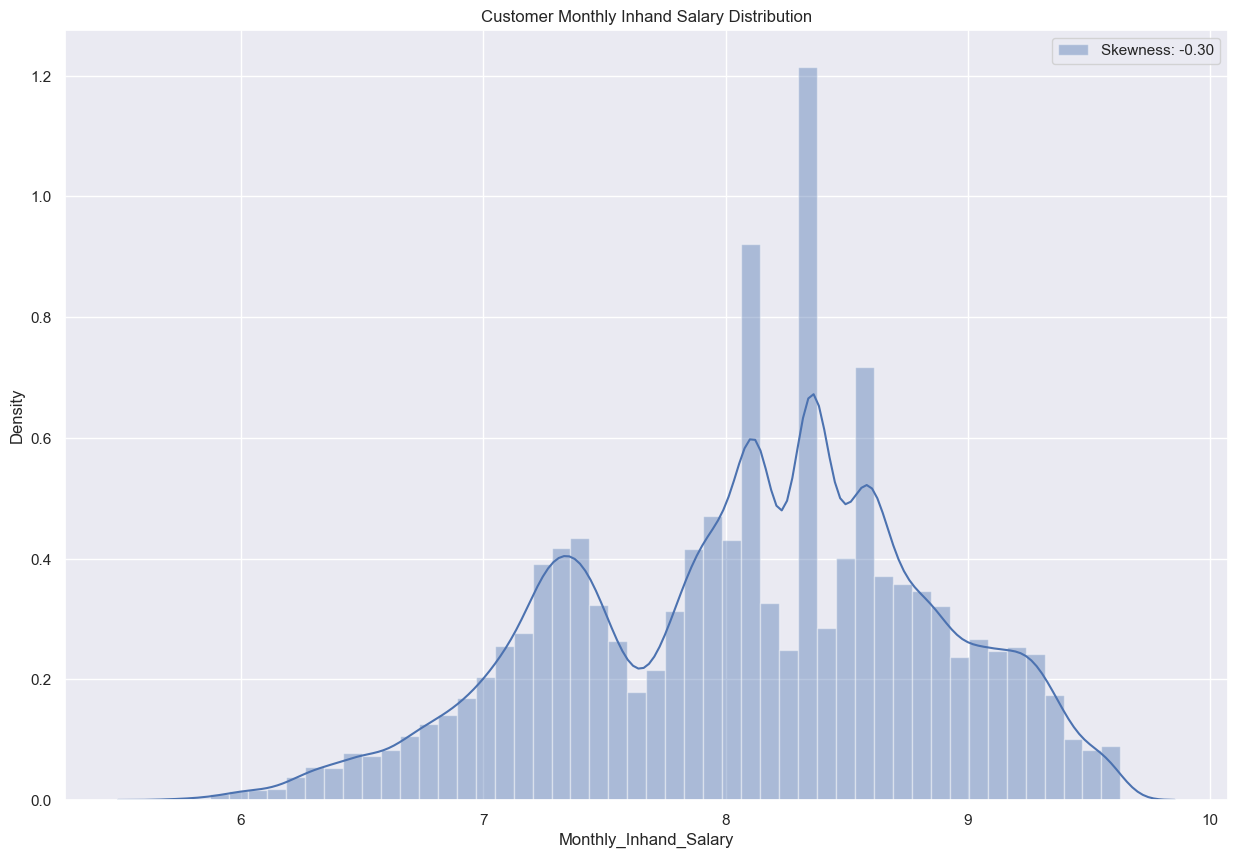

In [944]:
#Understanding the distribution of the data log(Monthly_Inhand_Salary)

modified_salary = [np.log(salary) if salary > 0 else 0 for salary in dataset['Monthly_Inhand_Salary']]
dataset['Monthly_Inhand_Salary'] = modified_salary

sns.distplot(dataset['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(dataset['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

Text(0.5, 1.0, 'Interest Rate Distribution')

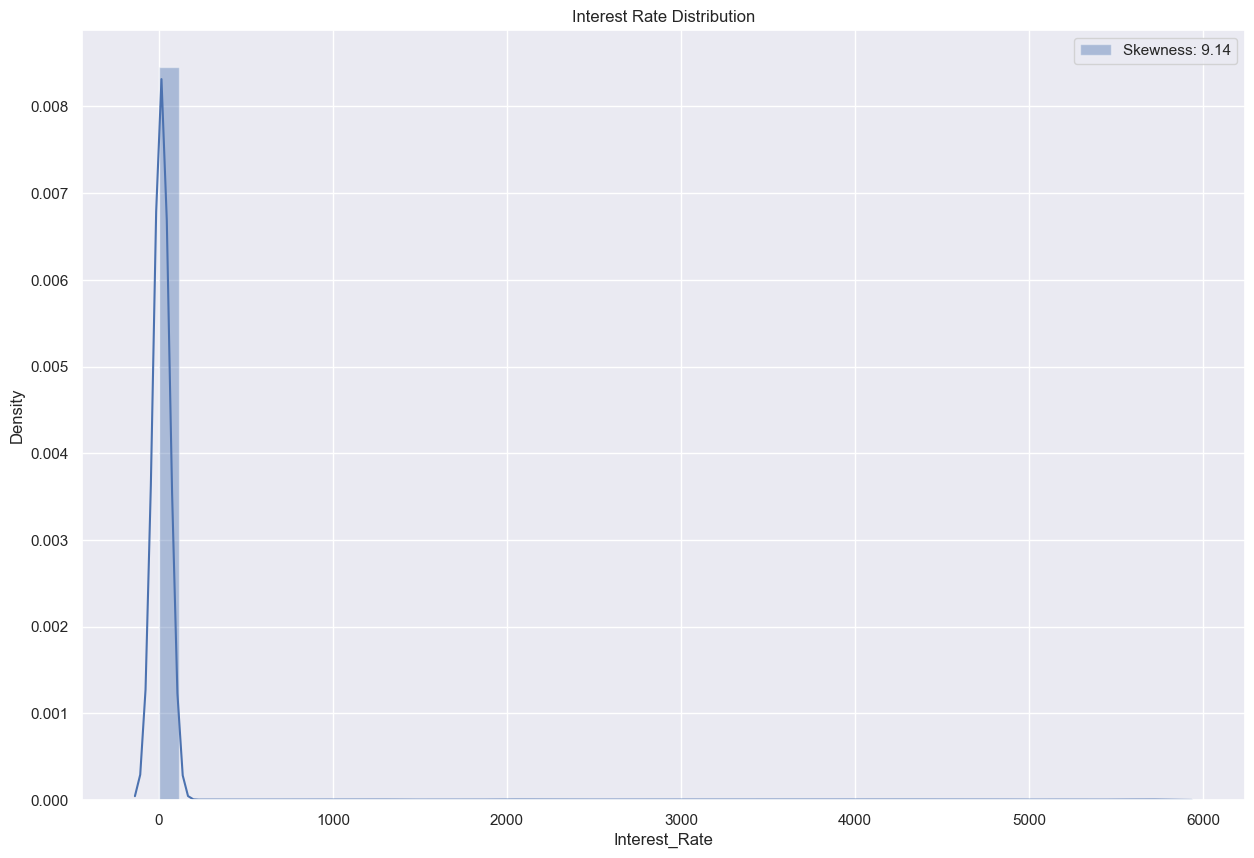

In [945]:
#Log Transforming the column - Interest_Rate
#Understanding the distribution of the column - Interest_Rate

sns.distplot(dataset['Interest_Rate'], label = 'Skewness: %.2f'%(dataset['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

Text(0.5, 1.0, 'Interest Rate Distribution')

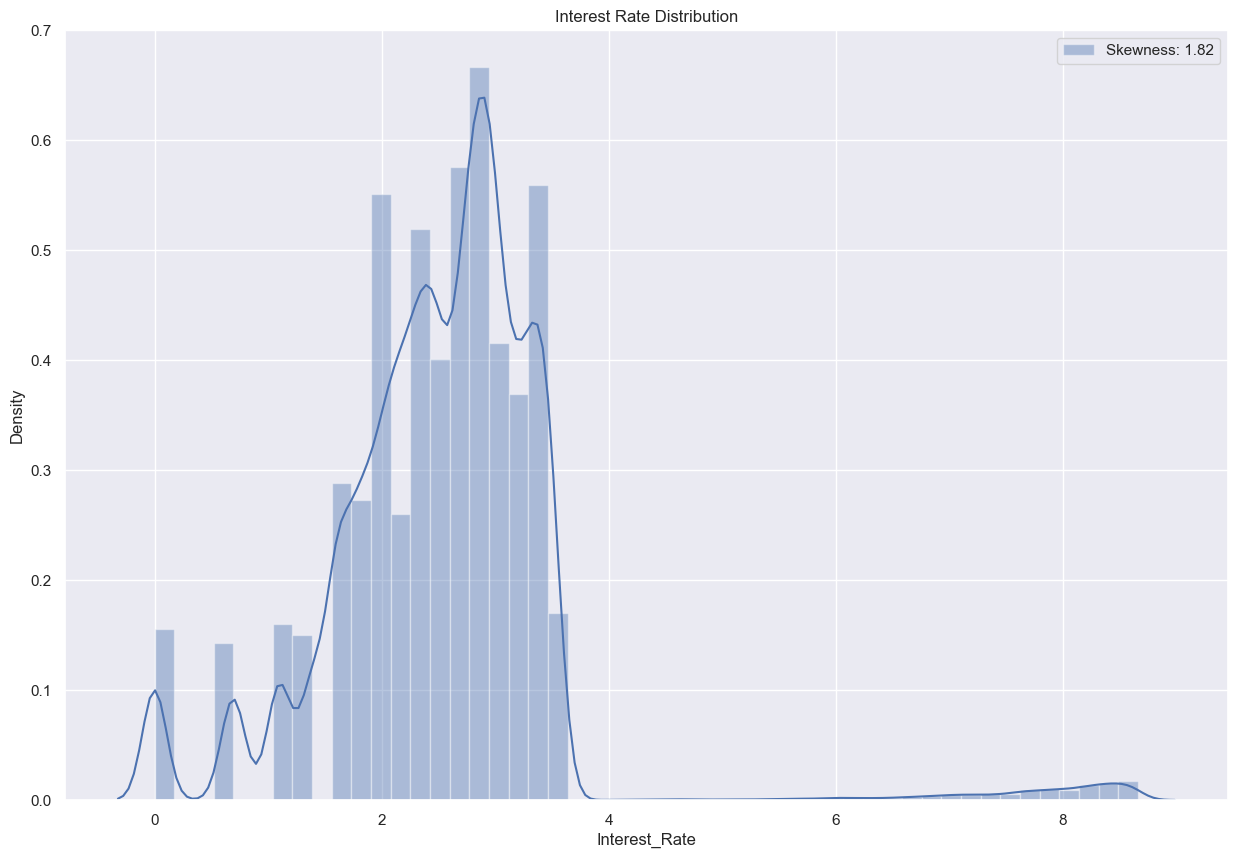

In [946]:
#Understanding the distribution of the data log(Interest_Rate)

modified_interest = [np.log(interest) if interest > 0 else 0 for interest in dataset['Interest_Rate']]
dataset['Interest_Rate'] = modified_interest

sns.distplot(dataset['Interest_Rate'], label = 'Skewness: %.2f'%(dataset['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

Text(0.5, 1.0, 'Delayed Payment Distribution')

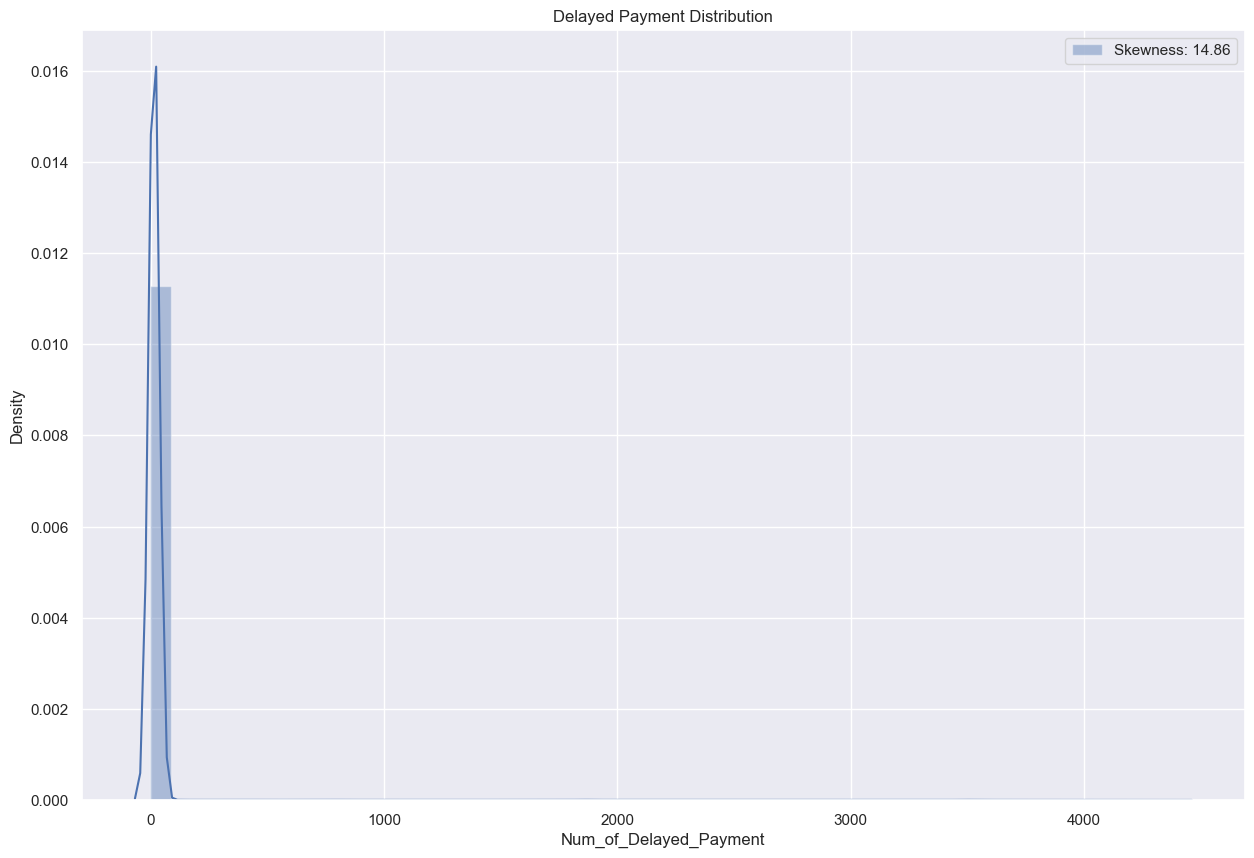

In [947]:
#Log Transforming the column - Num_of_Delayed_Payment
#Understanding the distribution of the column - Num_of_Delayed_Payment

sns.distplot(dataset['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(dataset['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')


Text(0.5, 1.0, 'Delayed Payment Distribution')

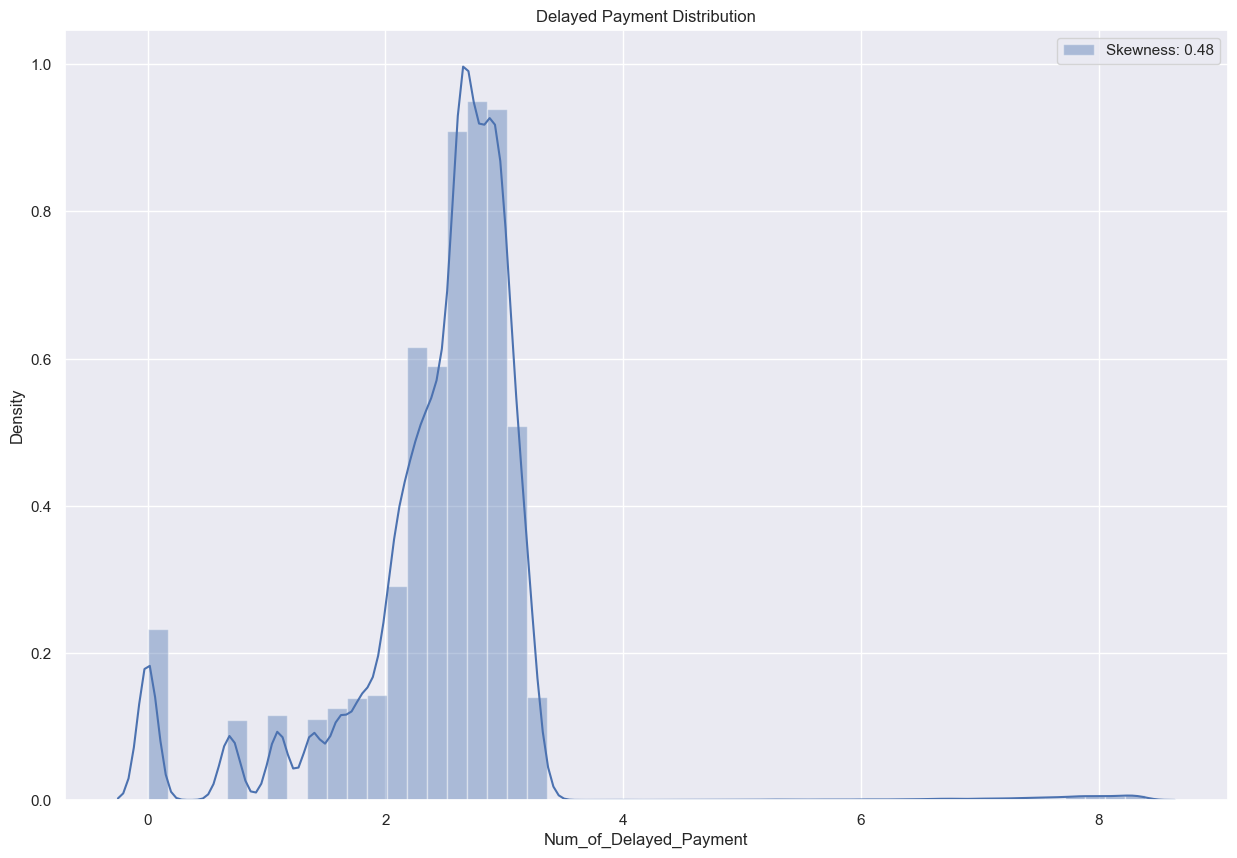

In [948]:
#Understanding the distribution of the data log(Num_of_Delayed_Payment)

modified_payment = [np.log(payment) if payment > 0 else 0 for payment in dataset['Num_of_Delayed_Payment']]
dataset['Num_of_Delayed_Payment'] = modified_payment

sns.distplot(dataset['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(dataset['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')

Text(0.5, 1.0, 'Number of Credit Inquiries')

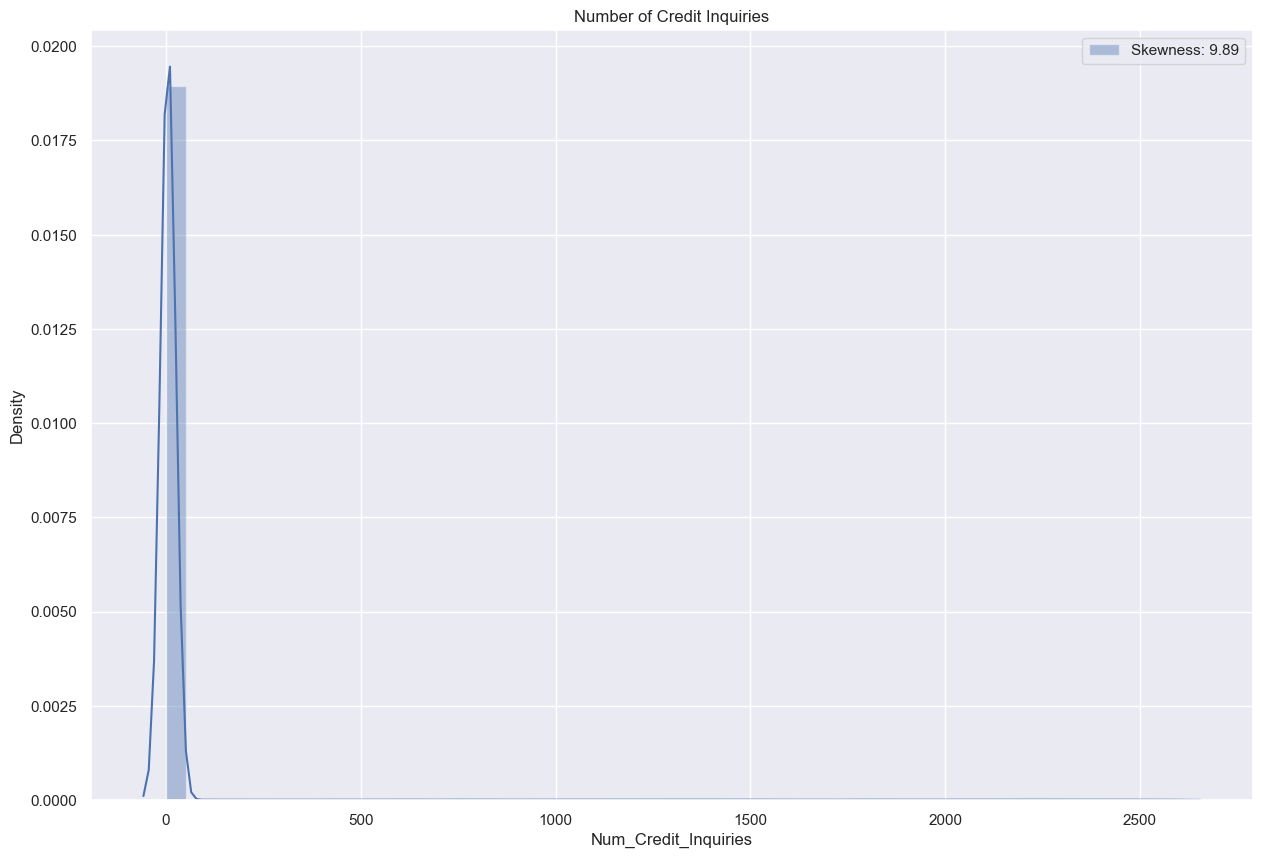

In [949]:
#Log Transforming the column - Num_Credit_Inquiries
#Understanding the distribution of the column - Num_Credit_Inquiries

sns.distplot(dataset['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(dataset['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Inquiries')

Text(0.5, 1.0, 'Number of Credit Card Inquiries')

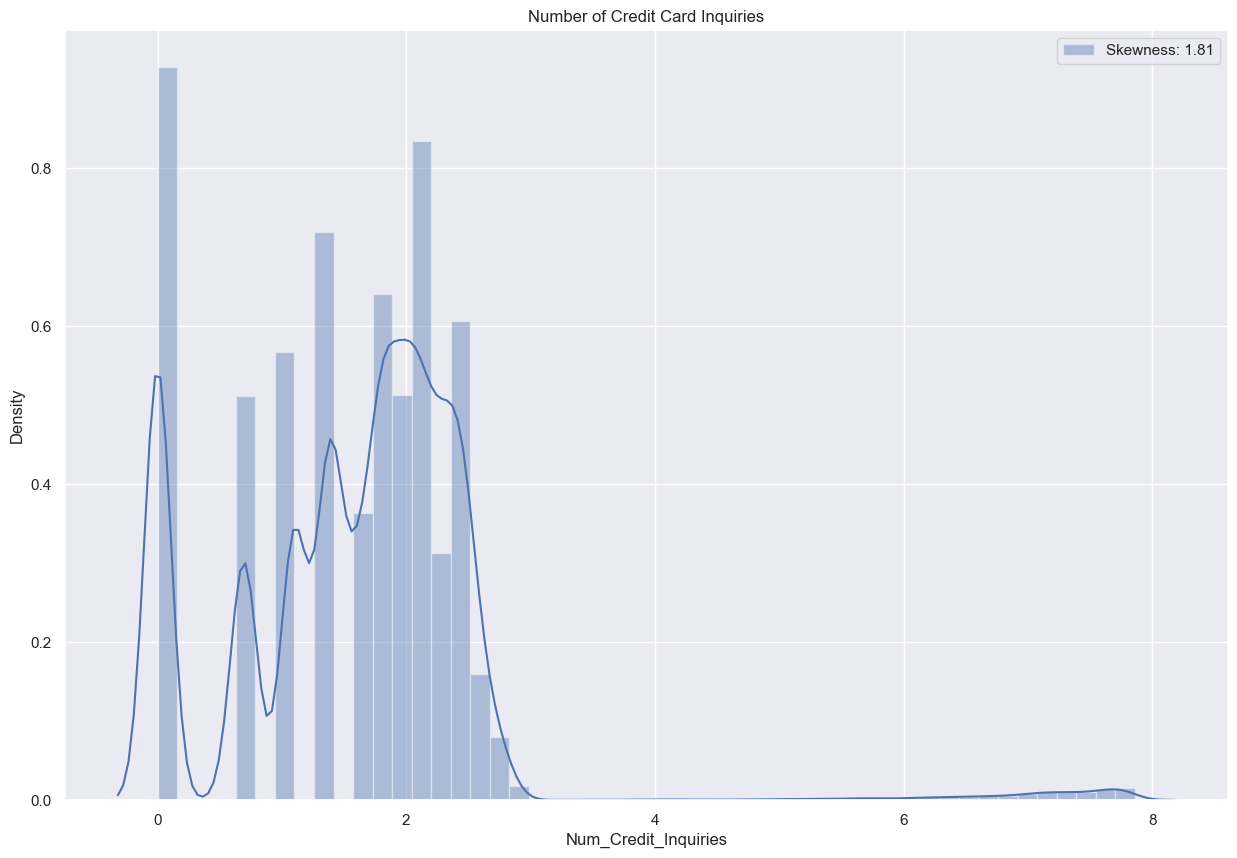

In [950]:
#Understanding the distribution of the data log(Num_Credit_Inquiries)

modified_inquiries = [np.log(inquiries) if inquiries > 0 else 0 for inquiries in dataset['Num_Credit_Inquiries']]
dataset['Num_Credit_Inquiries'] = modified_inquiries

sns.distplot(dataset['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(dataset['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Card Inquiries')

Text(0.5, 1.0, 'Total EMI per month Distribution')

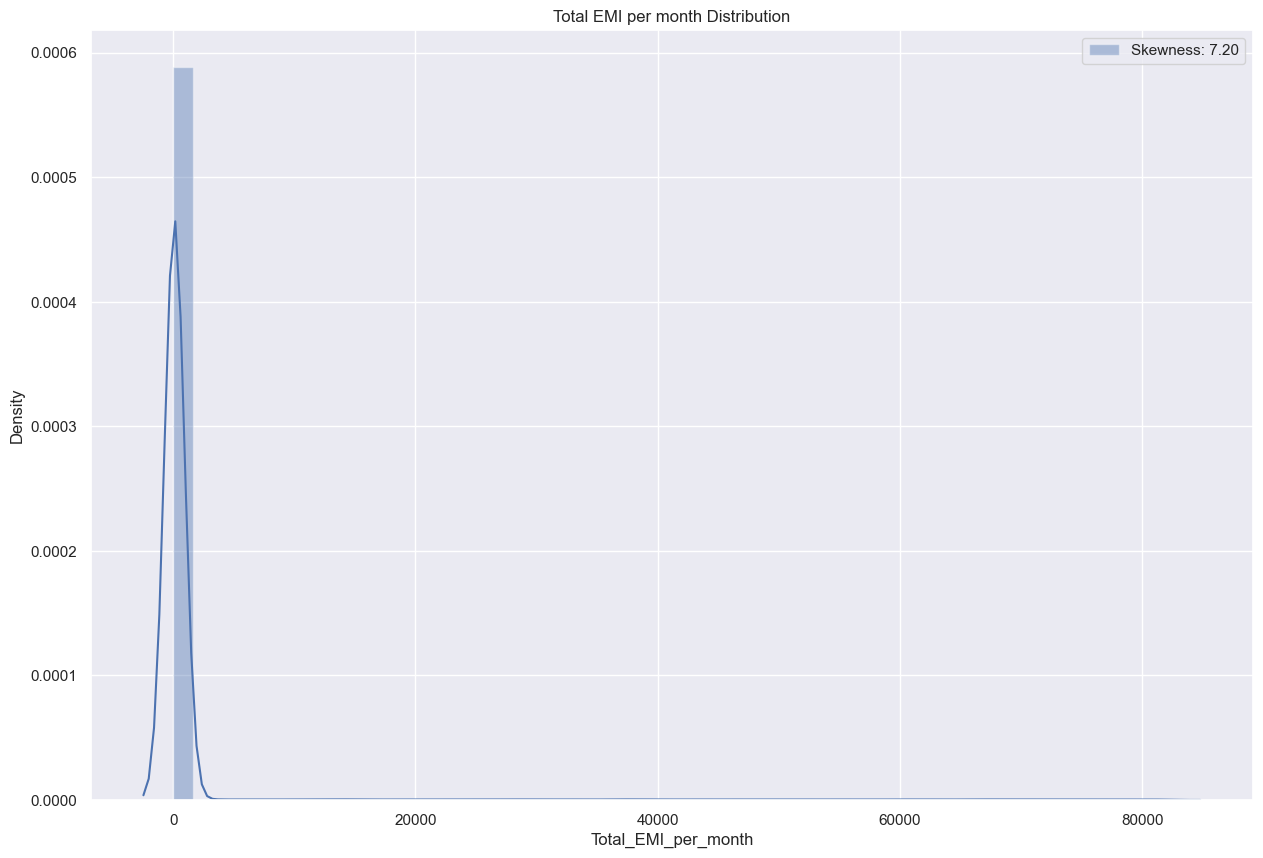

In [951]:
#Log Transforming the column - Total_EMI_per_month
#Understanding the distribution of the column - Total_EMI_per_month

sns.distplot(dataset['Total_EMI_per_month'], label = 'Skewness: %.2f'%(dataset['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')

Text(0.5, 1.0, 'Total EMI per month Distribution')

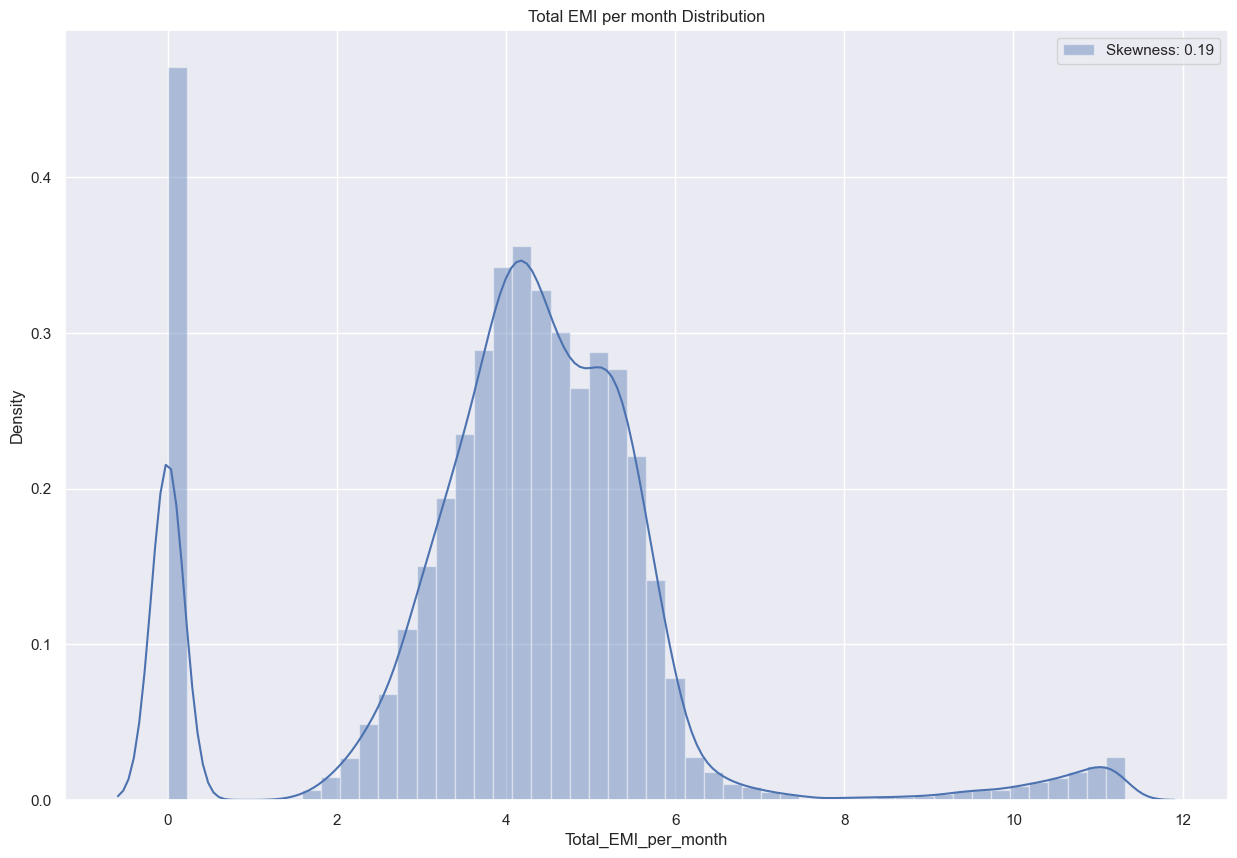

In [952]:
#Understanding the distribution of the data log(Total_EMI_per_month)

modified_emi = [np.log(emi) if emi > 0 else 0 for emi in dataset['Total_EMI_per_month']]
dataset['Total_EMI_per_month'] = modified_emi

sns.distplot(dataset['Total_EMI_per_month'], label = 'Skewness: %.2f'%(dataset['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')

Text(0.5, 1.0, 'Amount invested monthly Distribution')

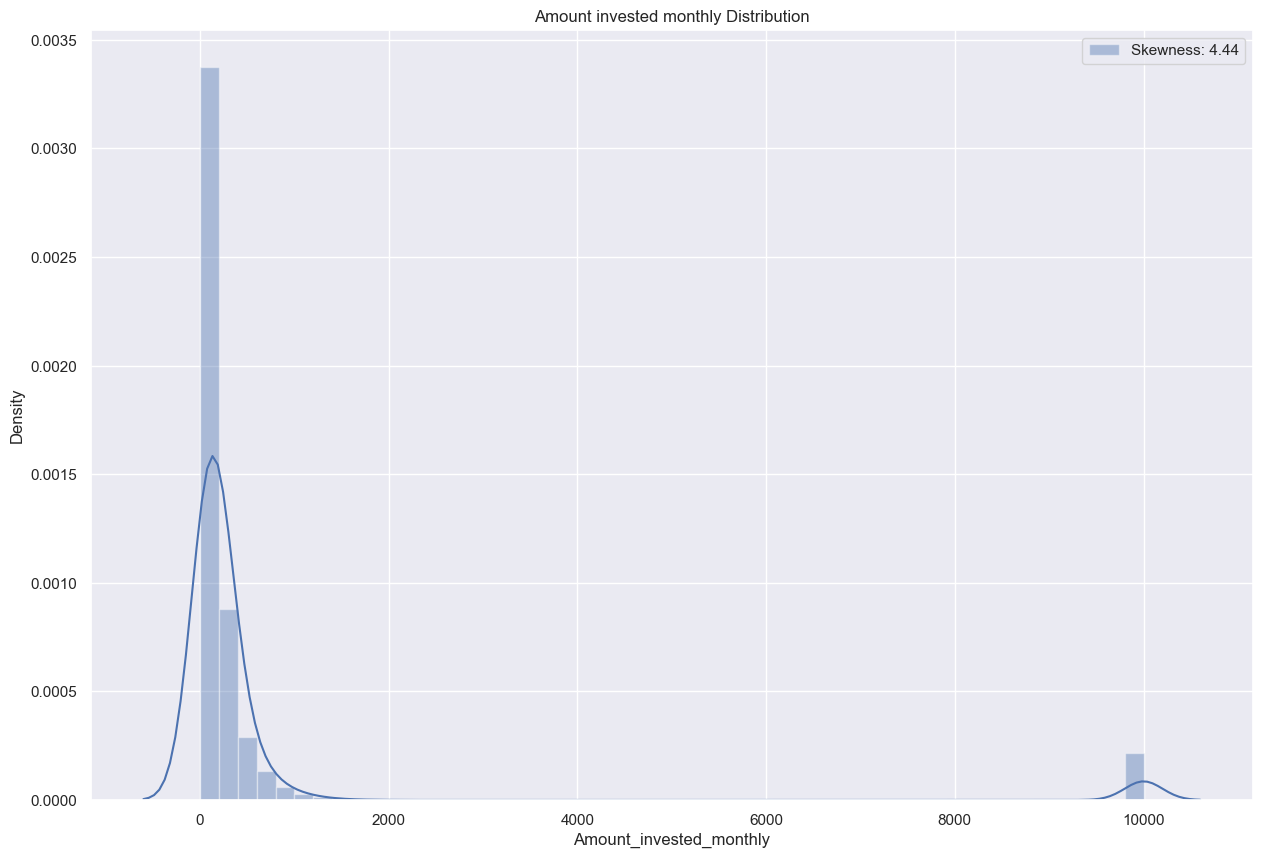

In [953]:
#Log Transforming the column - Amount_invested_monthly
#Understanding the distribution of the column - Amount_invested_monthly

sns.distplot(dataset['Amount_invested_monthly'], label = 'Skewness: %.2f'%(dataset['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')

Text(0.5, 1.0, 'Amount invested monthly Distribution')

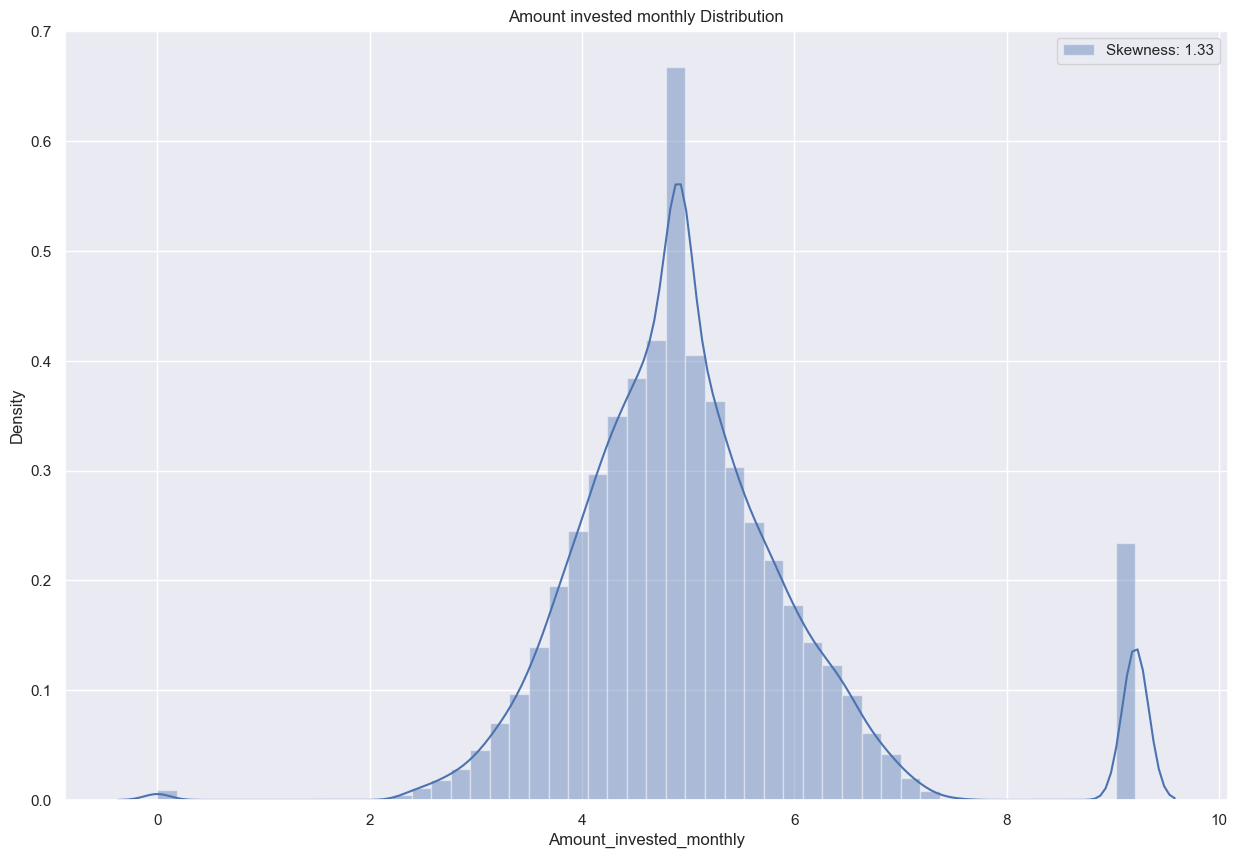

In [954]:
#Understanding the distribution of the data log(Amount_invested_monthly)

modified_amount = [np.log(amount) if amount > 0 else 0 for amount in dataset['Amount_invested_monthly']]
dataset['Amount_invested_monthly'] = modified_amount

sns.distplot(dataset['Amount_invested_monthly'], label = 'Skewness: %.2f'%(dataset['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')

Feature Encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

In [955]:
#Encoding the columns - Month, Occupation, Payment_of_Min_Amount of the dataset

encoded_dataset = pd.get_dummies(data = dataset, 
                                       columns = ['Month', 'Occupation', 'Payment_of_Min_Amount'])
encoded_dataset



,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,...,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,3.135494,7.509249,1.098612,3,1.945910,11.27,1.386294,809.98,3.903486,4.387204,...,0,0,0,1,0,0,0,0,1,0
1,3.135494,8.590437,1.098612,-1,2.639057,11.27,1.386294,809.98,3.903486,4.773057,...,0,0,0,1,0,0,0,0,1,0
2,0.000000,8.590437,1.098612,3,1.945910,0.00,1.386294,809.98,3.903486,4.403048,...,0,0,0,1,0,0,0,0,1,0
3,3.135494,8.590437,1.098612,5,1.386294,6.27,1.386294,809.98,3.903486,5.295604,...,0,0,0,1,0,0,0,0,1,0
4,3.135494,7.509249,1.098612,6,2.639057,11.27,1.386294,809.98,3.903486,3.723768,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,3.218876,8.119522,1.945910,23,1.945910,11.50,1.098612,502.38,3.558316,4.110404,...,1,0,0,0,0,0,0,0,1,0
99512,3.218876,8.119522,1.945910,18,1.945910,11.50,1.098612,502.38,3.558316,3.992422,...,1,0,0,0,0,0,0,0,1,0
99513,3.218876,8.119522,8.653296,27,1.791759,11.50,1.098612,502.38,3.558316,3.179240,...,1,0,0,0,0,0,0,0,1,0
99514,3.218876,8.119522,1.945910,20,2.639057,11.50,1.098612,502.38,3.558316,5.528129,...,1,0,0,0,0,0,0,0,1,0


In [956]:
#Encoding the Credit Score (Target) column

credit_score_data = encoded_dataset['Credit_Score']
target = []

for each_credit_score in credit_score_data:
    if each_credit_score == 'Good':
        target.append(2)
    elif each_credit_score == 'Standard':
        target.append(1)
    else:
        target.append(0)

#Removing the Credit Score column

encoded_dataset.drop(['Credit_Score'], axis = 1, inplace = True)

#Adding the Target column

encoded_dataset['Target'] = target

In [957]:
#Looking at the dataset

encoded_dataset

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,...,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Target
0,3.135494,7.509249,1.098612,3,1.945910,11.27,1.386294,809.98,3.903486,4.387204,...,0,0,1,0,0,0,0,1,0,2
1,3.135494,8.590437,1.098612,-1,2.639057,11.27,1.386294,809.98,3.903486,4.773057,...,0,0,1,0,0,0,0,1,0,2
2,0.000000,8.590437,1.098612,3,1.945910,0.00,1.386294,809.98,3.903486,4.403048,...,0,0,1,0,0,0,0,1,0,2
3,3.135494,8.590437,1.098612,5,1.386294,6.27,1.386294,809.98,3.903486,5.295604,...,0,0,1,0,0,0,0,1,0,2
4,3.135494,7.509249,1.098612,6,2.639057,11.27,1.386294,809.98,3.903486,3.723768,...,0,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,3.218876,8.119522,1.945910,23,1.945910,11.50,1.098612,502.38,3.558316,4.110404,...,0,0,0,0,0,0,0,1,0,0
99512,3.218876,8.119522,1.945910,18,1.945910,11.50,1.098612,502.38,3.558316,3.992422,...,0,0,0,0,0,0,0,1,0,0
99513,3.218876,8.119522,8.653296,27,1.791759,11.50,1.098612,502.38,3.558316,3.179240,...,0,0,0,0,0,0,0,1,0,0
99514,3.218876,8.119522,1.945910,20,2.639057,11.50,1.098612,502.38,3.558316,5.528129,...,0,0,0,0,0,0,0,1,0,1


6.Modelling

Credit Score detection is a classfication problem, we will need to use classfication models, to train on the model to make predictions

Splitting the Training Data

Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [958]:
#Splitting the data to the matrices X and Y using the training set.

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [959]:
#Looking at the new training data - X

X

array([[3.13549422, 7.50924942, 1.09861229, ..., 0.        , 1.        ,
        0.        ],
       [3.13549422, 8.59043728, 1.09861229, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 8.59043728, 1.09861229, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.21887582, 8.11952238, 8.65329627, ..., 0.        , 1.        ,
        0.        ],
       [3.21887582, 8.11952238, 1.94591015, ..., 0.        , 1.        ,
        0.        ],
       [3.21887582, 8.11952238, 1.94591015, ..., 0.        , 1.        ,
        0.        ]])

In [960]:
#Looking at the new test data - Y

Y

array([2, 2, 2, ..., 0, 1, 0], dtype=int64)

In [961]:
#Dividing the dataset into train and test in the ratio of 70 : 30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 27, shuffle = True)

In [962]:
X_train

array([[3.21887582, 8.60159316, 1.94591015, ..., 0.        , 1.        ,
        0.        ],
       [3.36729583, 8.35203398, 2.77258872, ..., 0.        , 0.        ,
        1.        ],
       [3.25809654, 8.87083469, 2.19722458, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.40119738, 8.75506823, 3.04452244, ..., 0.        , 0.        ,
        1.        ],
       [3.66356165, 8.68014588, 2.48490665, ..., 0.        , 0.        ,
        1.        ],
       [3.29583687, 7.85236359, 1.60943791, ..., 0.        , 1.        ,
        0.        ]])

In [963]:
X_test

array([[3.40119738, 7.79738713, 2.7080502 , ..., 0.        , 0.        ,
        1.        ],
       [2.77258872, 7.29339459, 3.4339872 , ..., 0.        , 0.        ,
        1.        ],
       [3.36729583, 8.75700138, 1.09861229, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.55534806, 8.74839724, 2.39789527, ..., 0.        , 1.        ,
        0.        ],
       [3.73766962, 8.66749103, 1.60943791, ..., 0.        , 0.        ,
        1.        ],
       [3.87120101, 9.02235883, 1.94591015, ..., 0.        , 1.        ,
        0.        ]])

In [964]:
Y_train

array([2, 1, 2, ..., 1, 1, 2], dtype=int64)

In [965]:
Y_test

array([1, 1, 1, ..., 2, 1, 2], dtype=int64)

Fit Model

In [966]:
#Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

In [967]:
#Dictionary to store model and its precision

model_precision = OrderedDict()

In [968]:
#Dictionary to store model and its recall

model_recall = OrderedDict()

Applying Logistic Regression

In [969]:
#Training the Logistic Regression model on the dataset

logistic_classifier = LogisticRegression(random_state = 27)
logistic_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=27)

In [970]:
#Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [2 1]
 ...
 [2 2]
 [1 1]
 [1 2]]


In [971]:
#Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Logistic Regression'] = logistic_accuracy

logistic_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Logistic Regression'] = logistic_precision

logistic_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Logistic Regression'] = logistic_recall

print('The accuracy of this model is {} %.'.format(logistic_accuracy))
print('The precision of this model is {} %.'.format(logistic_precision))
print('The recall of this model is {} %.'.format(logistic_recall))

[[ 3365  5107   192]
 [ 1833 13065   986]
 [   76  4002  1229]]
The accuracy of this model is 59.15 %.
The precision of this model is 58.94 %.
The recall of this model is 59.15 %.


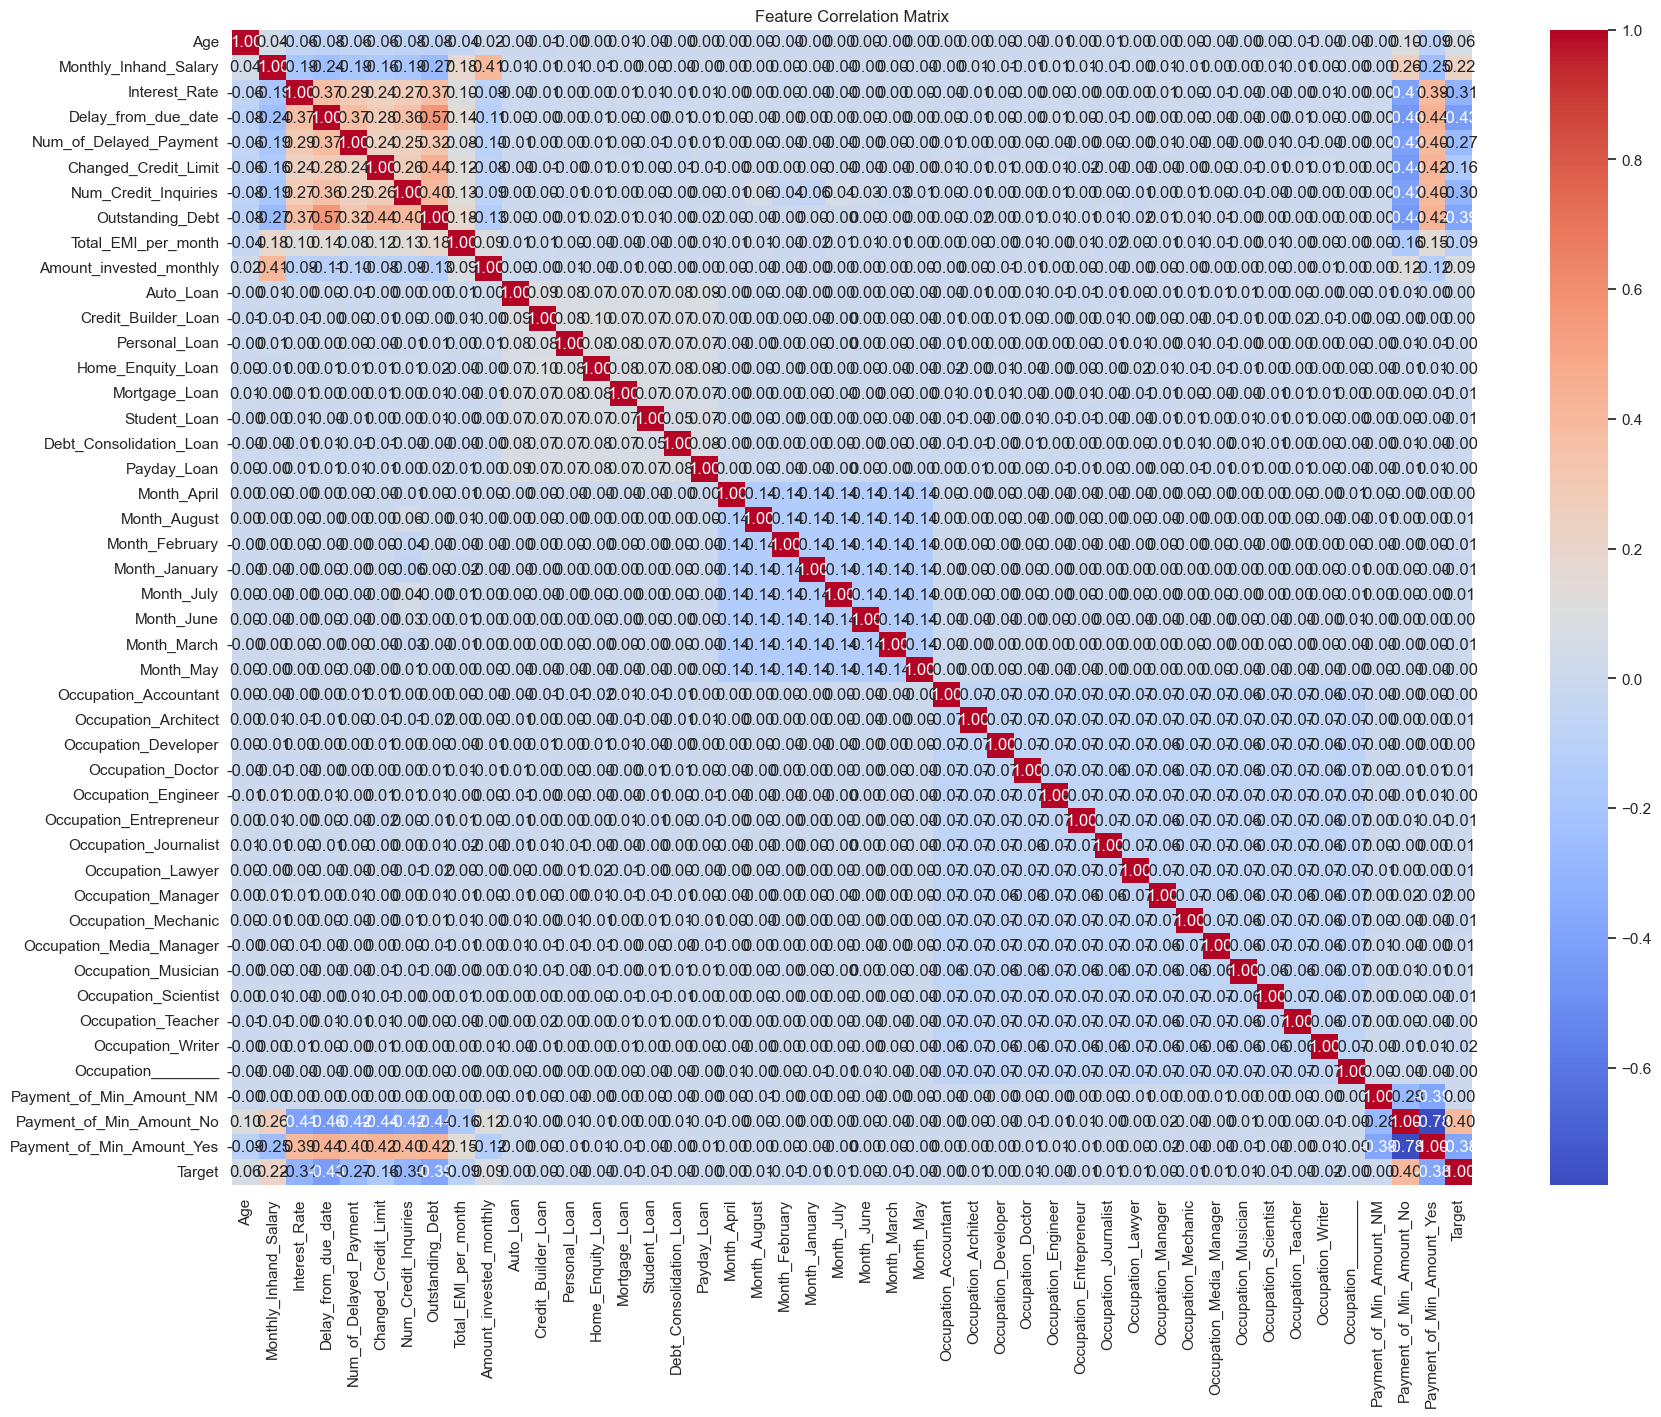

In [972]:
# Generate the correlation matrix
correlation_matrix = encoded_dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))  # You can adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


Model evaluation

In [973]:
model_accuracy

OrderedDict([('Logistic Regression', 59.15)])

In [974]:
model_precision

OrderedDict([('Logistic Regression', 58.94)])

In [975]:
model_recall

OrderedDict([('Logistic Regression', 59.15)])

In [976]:
table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Model Precision', 'Model Recall'])
count = 1

for model in model_accuracy:
    row = [count, model, model_accuracy[model], model_precision[model], model_recall[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤════════════════════════╤══════════════════╤═══════════════════╤════════════════╕
│   S.No. │ Classification Model   │   Model Accuracy │   Model Precision │   Model Recall │
╞═════════╪════════════════════════╪══════════════════╪═══════════════════╪════════════════╡
│       1 │ Logistic Regression    │            59.15 │             58.94 │          59.15 │
╘═════════╧════════════════════════╧══════════════════╧═══════════════════╧════════════════╛


In [977]:
# Generating detailed classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=['Good', 'Poor', 'Standard']))

print('Model Performance Metrics:')
print(f'Accuracy: {logistic_accuracy}%')
print(f'Precision: {logistic_precision}%')
print(f'Recall: {logistic_recall}%')



Classification Report:
              precision    recall  f1-score   support

        Good       0.64      0.39      0.48      8664
        Poor       0.59      0.82      0.69     15884
    Standard       0.51      0.23      0.32      5307

    accuracy                           0.59     29855
   macro avg       0.58      0.48      0.50     29855
weighted avg       0.59      0.59      0.56     29855

Model Performance Metrics:
Accuracy: 59.15%
Precision: 58.94%
Recall: 59.15%


7. Conclusion

Based on the evaluation of the Logistic Regression model for credit score detection, several conclusions can be drawn:

1. **Accuracy Assessment:** The Logistic Regression model achieved an accuracy of approximately 59.15%. This indicates that the model's predictions were correct for nearly 59.15% of the instances in the test dataset.

2. **Precision Analysis:** The precision score, which measures the proportion of true positive predictions among all positive predictions made by the model, was around 58.94%. This suggests that when the model predicted a certain credit score category, it was accurate nearly 58.94% of the time.

3. **Recall Evaluation:** The recall score, representing the ability of the model to correctly identify true positives from all actual positives, was approximately 59.15%. This implies that the model successfully captured about 59.15% of the instances belonging to each credit score category.

4. **Classification Report Insights:** Upon examining the detailed classification report, it's evident that the model performed relatively well in distinguishing between "Poor" credit scores, achieving a recall of 0.82. However, it struggled more with "Good" and "Standard" credit scores, with lower recall scores of 0.39 and 0.23, respectively.

5. **Model Performance Metrics Recap:** In summary, the Logistic Regression model demonstrated moderate performance in predicting credit scores. While it provided better accuracy and precision compared to random guessing, there is room for improvement, especially in correctly identifying instances of "Good" and "Standard" credit scores.

6. **Further Considerations:** To enhance model performance, additional feature engineering, model tuning, or exploring alternative algorithms could be beneficial. Additionally, domain expertise and further data analysis may reveal insights to refine the model and better capture the complexities of credit scoring.
